In [1]:
import pandas as pd

# Load the data
orders = pd.read_csv('heuristic_orders.csv')
planting = pd.read_csv('heuristic_planting.csv')

# Merge the data on 'day' and 'plant_type'
merged_data = pd.merge(orders, planting, on=['day', 'plant_type'], suffixes=('_orders', '_planting'))

# Display the first few rows of the merged data
print(merged_data.head())

   day nursery plant_type  quantity_orders  arrival_day polygon  \
0   12      V4         E2              400           13     P11   
1   12      V4         E2              400           13     P18   
2   22      V4         E2              342           23     P31   
3   22      V4         E2              342           23     P28   
4   22      V4         E2              342           23     P24   

   quantity_planting  
0                 80  
1                 80  
2                 76  
3                 67  
4                 80  


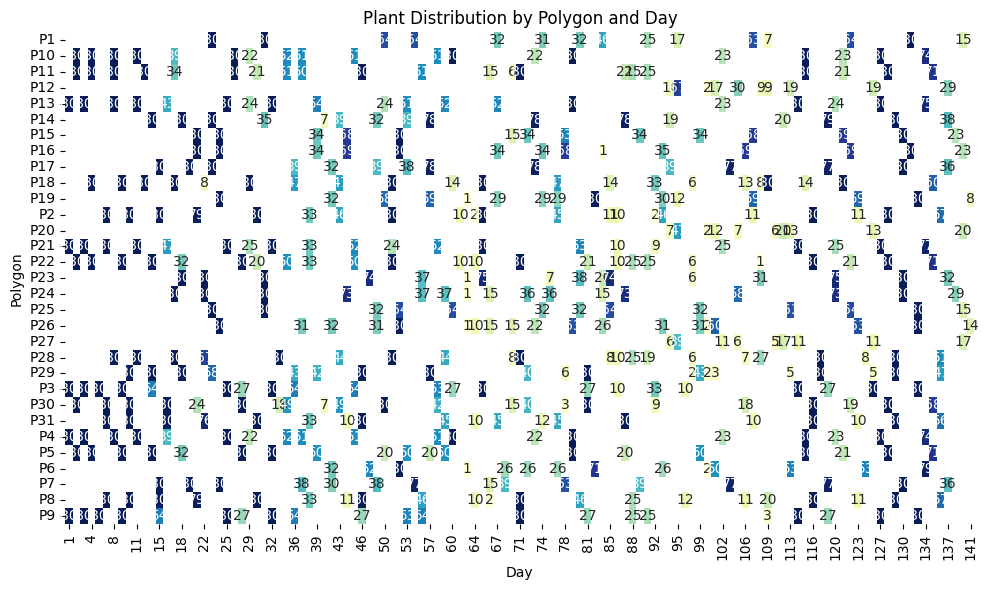

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df = planting

# Aggregate quantity by polygon and day to avoid duplicates
agg_df = df.groupby(['polygon', 'day'])['quantity'].sum().reset_index()

# Pivot the data
pivot_df = agg_df.pivot(index='polygon', columns='day', values='quantity')

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Plant Distribution by Polygon and Day')
plt.ylabel('Polygon')
plt.xlabel('Day')
plt.tight_layout()
plt.show()

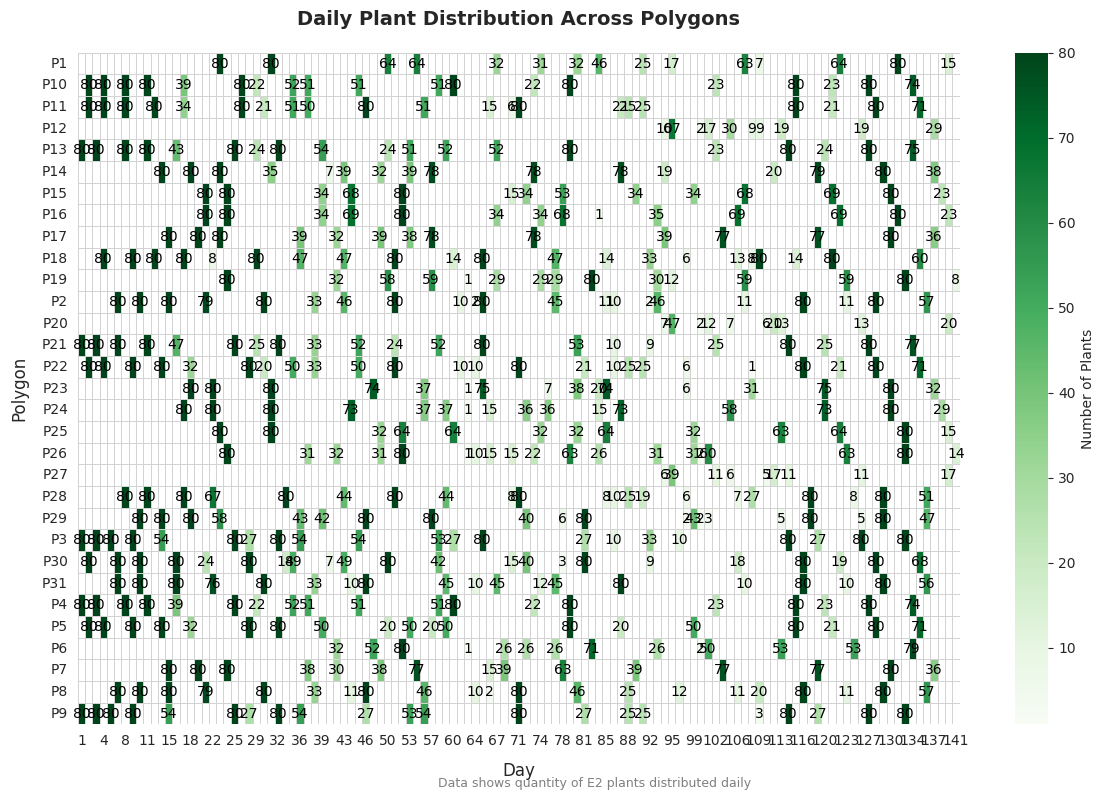

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set overall style
sns.set_style("whitegrid")
mpl.rcParams['font.family'] = 'DejaVu Sans'  # Or any clean font you prefer

# Aggregate quantity by polygon and day
agg_df = df.groupby(['polygon', 'day'])['quantity'].sum().reset_index()

# Pivot the data
pivot_df = agg_df.pivot(index='polygon', columns='day', values='quantity')

# Create figure with better proportions
plt.figure(figsize=(12, 8), dpi=100)

# Create heatmap with enhanced styling
ax = sns.heatmap(
    pivot_df,
    annot=True,
    fmt='g',  # General number format
    cmap='Greens',  # More natural color scheme
    cbar=True,
    cbar_kws={'label': 'Number of Plants'},
    linewidths=0.5,
    linecolor='lightgray',
    annot_kws={'size': 10, 'color': 'black'}
)

# Enhance title and labels
plt.title('Daily Plant Distribution Across Polygons', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Day', fontsize=12, labelpad=10)
plt.ylabel('Polygon', fontsize=12, labelpad=10)

# Improve tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add subtle grid
ax.grid(False)  # Disable default grid
ax.hlines(y=range(len(pivot_df)+1), xmin=0, xmax=len(pivot_df.columns), 
          colors='lightgray', linewidth=0.5)
ax.vlines(x=range(len(pivot_df.columns)+1), ymin=0, ymax=len(pivot_df), 
          colors='lightgray', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Add footer text
plt.figtext(0.5, 0.01, "Data shows quantity of E2 plants distributed daily", 
            ha="center", fontsize=9, color='gray')

plt.show()

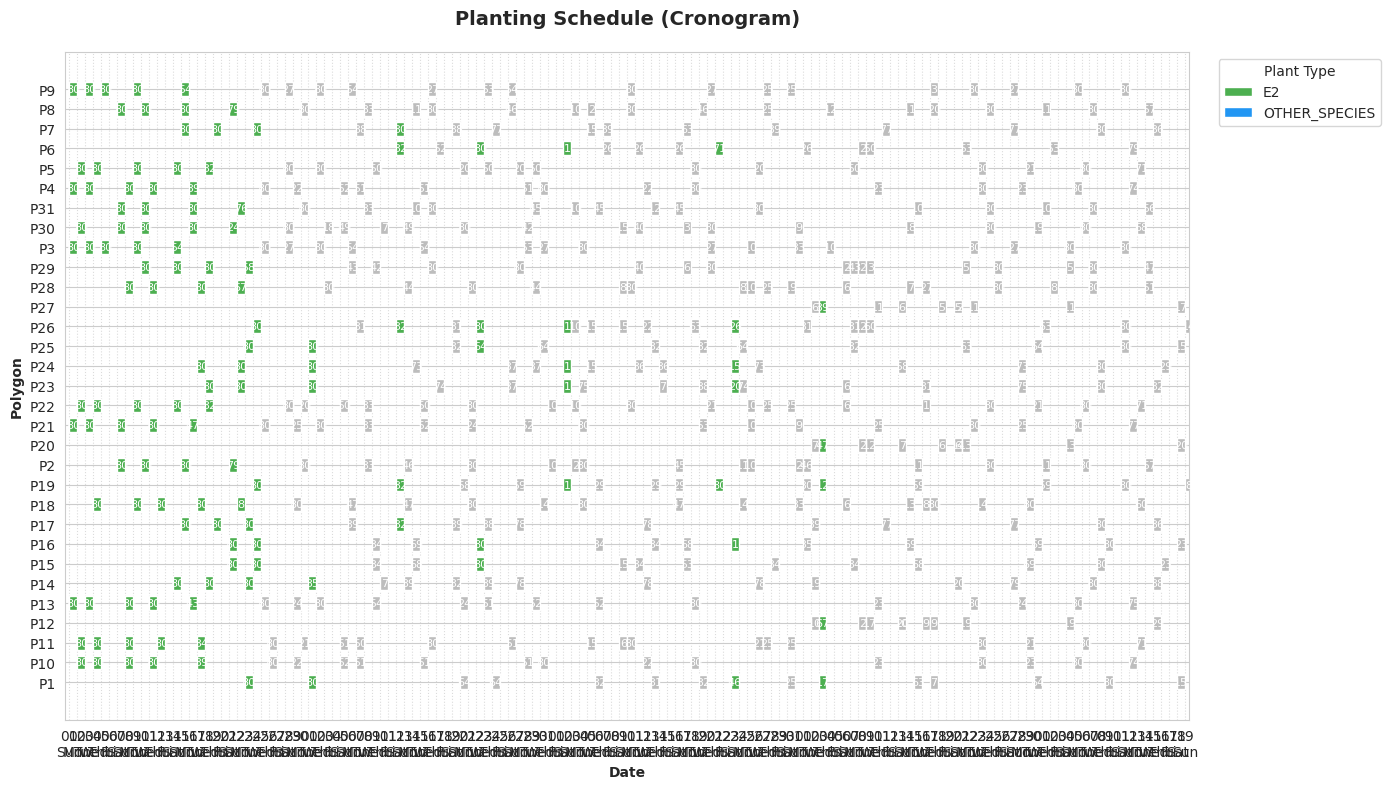

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.patches import Patch

# Convert days to dates (assuming day 1 = June 1st, 2023)
df['date'] = pd.to_datetime('2025-06-01') + pd.to_timedelta(df['day']-1, unit='D')

# Create color mapping for plant types
palette = {'E2': '#4CAF50', 'OTHER_SPECIES': '#2196F3'}  # Add other species if present
df['color'] = df['plant_type'].map(palette)
df['color'] = df['color'].fillna('#BDBDBD')  # Fill missing colors with gray

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each planting as a horizontal bar
for i, (polygon, group) in enumerate(df.groupby('polygon')):
    for _, row in group.iterrows():
        ax.barh(y=polygon, 
                width=pd.Timedelta(days=1),  # Each bar = 1 day duration
                left=row['date'],
                color=row['color'],
                edgecolor='white',
                height=0.7)

# Format x-axis as dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%a'))
plt.xticks(rotation=0)

# Customize appearance
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Polygon', fontweight='bold')
ax.set_title('Planting Schedule (Cronogram)', pad=20, fontsize=14, fontweight='bold')

# Add grid and adjust limits
ax.grid(axis='x', linestyle=':', alpha=0.7)
ax.set_xlim(df['date'].min() - pd.Timedelta(days=0.5), 
            df['date'].max() + pd.Timedelta(days=0.5))

# Create legend
legend_elements = [Patch(facecolor=color, label=species) 
                   for species, color in palette.items()]
ax.legend(handles=legend_elements, title='Plant Type', 
          bbox_to_anchor=(1.02, 1), loc='upper left')

# Add quantity labels
for _, row in df.iterrows():
    ax.text(x=row['date'] + pd.Timedelta(hours=12), 
            y=row['polygon'],
            s=f"{row['quantity']}",
            va='center',
            ha='center',
            color='white',
            fontsize=8)

plt.tight_layout()
plt.show()

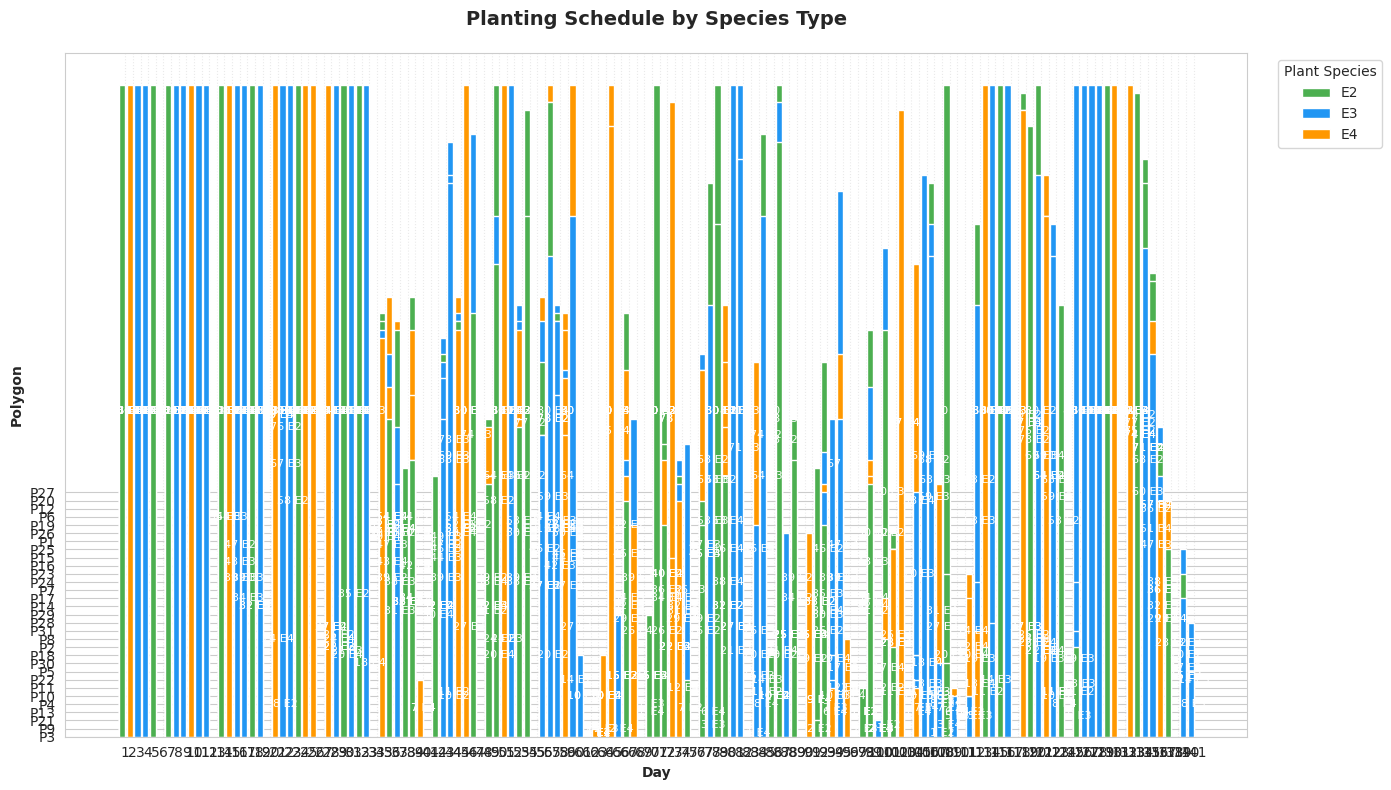

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Create example data with multiple species (modify with your actual data)
# Let's assume we have E2, E3, E4 species in our dataset
np.random.seed(42)
species = ['E2', 'E3', 'E4']
df['plant_type'] = np.random.choice(species, size=len(df))

# Create color palette for species
species_palette = {
    'E2': '#4CAF50',  # Green
    'E3': '#2196F3',  # Blue
    'E4': '#FF9800'   # Orange
}

# Create the figure
plt.figure(figsize=(14, 8))

# Plot stacked bars for each polygon
for i, polygon in enumerate(df['polygon'].unique()):
    poly_data = df[df['polygon'] == polygon]
    
    # Calculate bottom positions for stacking
    bottoms = {day: 0 for day in range(1, df['day'].max()+1)}
    
    for _, row in poly_data.iterrows():
        plt.bar(
            x=row['day'] - 0.4,  # Position adjustment
            height=row['quantity'],
            width=0.8,           # Bar width
            bottom=bottoms[row['day']],
            color=species_palette[row['plant_type']],
            edgecolor='white',
            label=row['plant_type']
        )
        bottoms[row['day']] += row['quantity']
        
        # Add quantity label (only if >0)
        if row['quantity'] > 0:
            plt.text(
                x=row['day'],
                y=bottoms[row['day']] - row['quantity']/2,
                s=f"{row['quantity']} {row['plant_type']}",
                ha='center',
                va='center',
                color='white',
                fontsize=8
            )

# Customize the plot
plt.yticks(range(len(df['polygon'].unique())), df['polygon'].unique())
plt.xticks(range(1, df['day'].max()+1))
plt.xlabel('Day', fontweight='bold')
plt.ylabel('Polygon', fontweight='bold')
plt.title('Planting Schedule by Species Type', pad=20, fontsize=14, fontweight='bold')

# Create custom legend
legend_elements = [
    Patch(facecolor=color, label=species) 
    for species, color in species_palette.items()
]
plt.legend(handles=legend_elements, title='Plant Species', 
           bbox_to_anchor=(1.02, 1), loc='upper left')

# Add grid and adjust layout
plt.grid(axis='x', linestyle=':', alpha=0.4)
plt.tight_layout()

plt.show()

In [28]:
planting = pd.read_csv('/Users/samanthabritoozuna/Desktop/heuristic_planting.csv')


In [32]:
planting

,day,polygon,plant_type,quantity
0,1,P3,E2,80
1,1,P9,E2,80
2,1,P21,E2,80
3,1,P13,E2,80
4,1,P4,E2,80
...,...,...,...,...
537,140,P27,E9,17
538,140,P1,E9,15
539,140,P25,E9,15
540,141,P26,E9,14


In [33]:
p10_data=planting[planting['polygon']=='P10']

In [34]:
p10_data

,day,polygon,plant_type,quantity
5,2,P10,E2,80
15,4,P10,E2,80
29,8,P10,E2,80
45,11,P10,E2,80
64,17,P10,E2,39
101,26,P10,E5,80
112,29,P10,E5,22
131,35,P10,E3,52
141,37,P10,E10,51
175,45,P10,E4,51


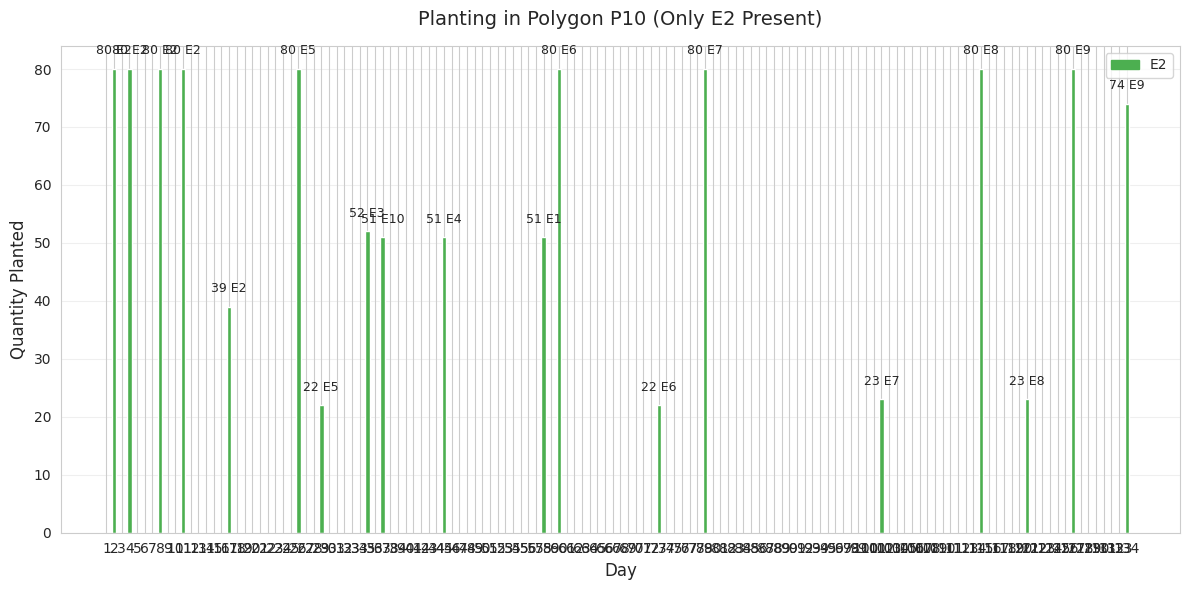

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for Polygon P10 (or change to another polygon)

# Create the plot
plt.figure(figsize=(12, 6))

# Since your sample only shows E2, we'll plot what exists
if not p10_data.empty:
    # Bar plot (since you have single species in sample)
    plt.bar(p10_data['day'], p10_data['quantity'], 
            color='#4CAF50', width=0.6, edgecolor='white')
    
    # Add value labels
    for i, row in p10_data.iterrows():
        plt.text(row['day'], row['quantity']+2, f"{row['quantity']} {row['plant_type']}",
                ha='center', va='bottom', fontsize=9)
    
    plt.title(f'Planting in Polygon P10 (Only {p10_data["plant_type"].iloc[0]} Present)', 
              pad=15, fontsize=14)
    plt.xlabel('Day', fontsize=12)
    plt.ylabel('Quantity Planted', fontsize=12)
    plt.xticks(range(1, p10_data['day'].max()+1))
    plt.grid(axis='y', alpha=0.3)
    
    # If you have multiple species, this would show in legend:
    if len(p10_data['plant_type'].unique()) > 1:
        handles = [plt.Rectangle((0,0),1,1, color='#4CAF50')]
        plt.legend(handles, p10_data['plant_type'].unique())
else:
    plt.text(0.5, 0.5, "No data for P10 in the provided sample", 
             ha='center', va='center', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [47]:
p10_data=planting[planting['polygon']=='P10']
p1_data=planting[planting['polygon']=='P1']
p3_data=planting[planting['polygon']=='P3']
p4_data=planting[planting['polygon']=='P4']

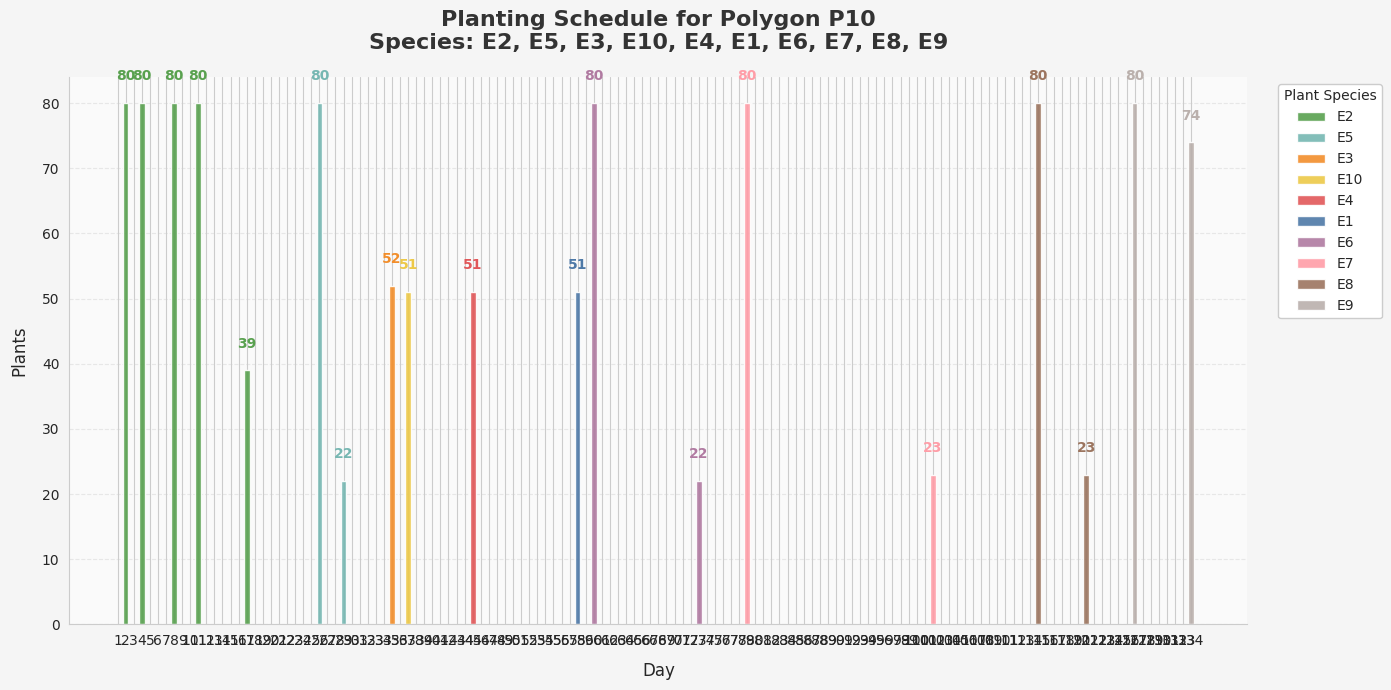

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Color palette for different species (expand as needed)
species_palette = {
    'E1': '#4E79A7',  # Blue
    'E2': '#59A14F',  # Green
    'E3': '#F28E2B',  # Orange
    'E4': '#E15759',  # Red
    'E5': '#76B7B2',  # Teal
    'E6': '#B07AA1',  # Purple
    'E7': '#FF9DA7',  # Pink
    'E8': '#9C755F',  # Brown
    'E9': '#BAB0AC',  # Gray
    'E10': '#EDC948'  # Yellow
}

# Filter for Polygon P10

# Create plot with improved styling
plt.figure(figsize=(14, 7), facecolor='#f5f5f5')  # Light gray background
ax = plt.gca()
ax.set_facecolor('#fafafa')  # Lighter plot area

if not p10_data.empty:
    # Get unique species in this polygon
    unique_species = p10_data['plant_type'].unique()
    
    # Plot each species separately (will work for single or multiple species)
    for species in unique_species:
        species_data = p10_data[p10_data['plant_type'] == species]
        ax.bar(species_data['day'], species_data['quantity'],
               color=species_palette.get(species, '#999999'),  # Default gray if species not in palette
               width=0.7,
               edgecolor='white',
               linewidth=1,
               label=species,
               alpha=0.9)  # Slight transparency
        
        # Add value labels
        for _, row in species_data.iterrows():
            ax.text(row['day'], row['quantity']+3, 
                   f"{row['quantity']}",
                   ha='center', va='bottom',
                   fontsize=10,
                   fontweight='bold',
                   color=species_palette.get(species, '#333333'))
    
    # Customize plot appearance
    ax.set_title(f'Planting Schedule for Polygon P10\nSpecies: {", ".join(unique_species)}',
                 fontsize=16, pad=20, fontweight='bold', color='#333333')
    ax.set_xlabel('Day', fontsize=12, labelpad=10)
    ax.set_ylabel('Plants', fontsize=12, labelpad=10)
    
    # Configure axes
    ax.set_xticks(range(1, p10_data['day'].max()+1))
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    
    # Add legend if multiple species
    if len(unique_species) > 1:
        ax.legend(title='Plant Species',
                  bbox_to_anchor=(1.02, 1),
                  loc='upper left',
                  frameon=True,
                  framealpha=1)
    
    # Add decorative elements
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#cccccc')
    ax.spines['bottom'].set_color('#cccccc')
    
else:
    ax.text(0.5, 0.5, "No planting data available for Polygon P10",
            ha='center', va='center',
            fontsize=14, color='#666666',
            style='italic')
    ax.axis('off')

plt.tight_layout()
plt.show()

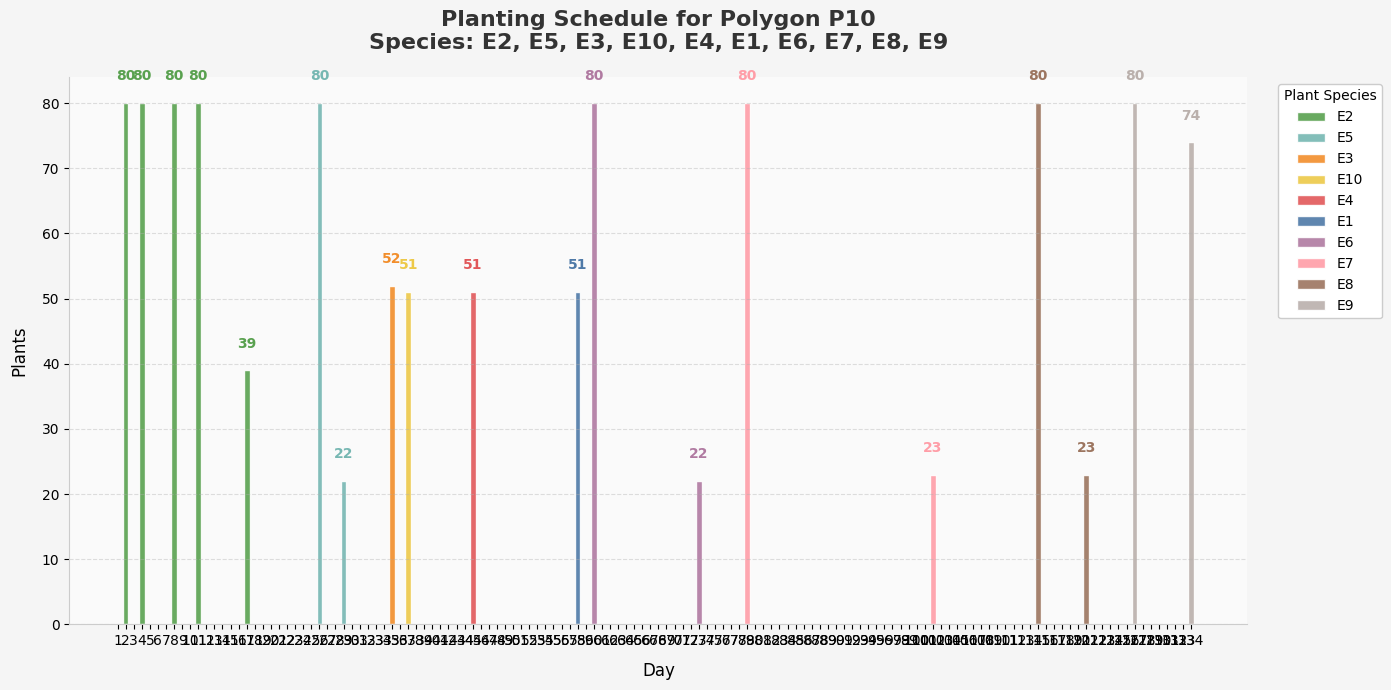

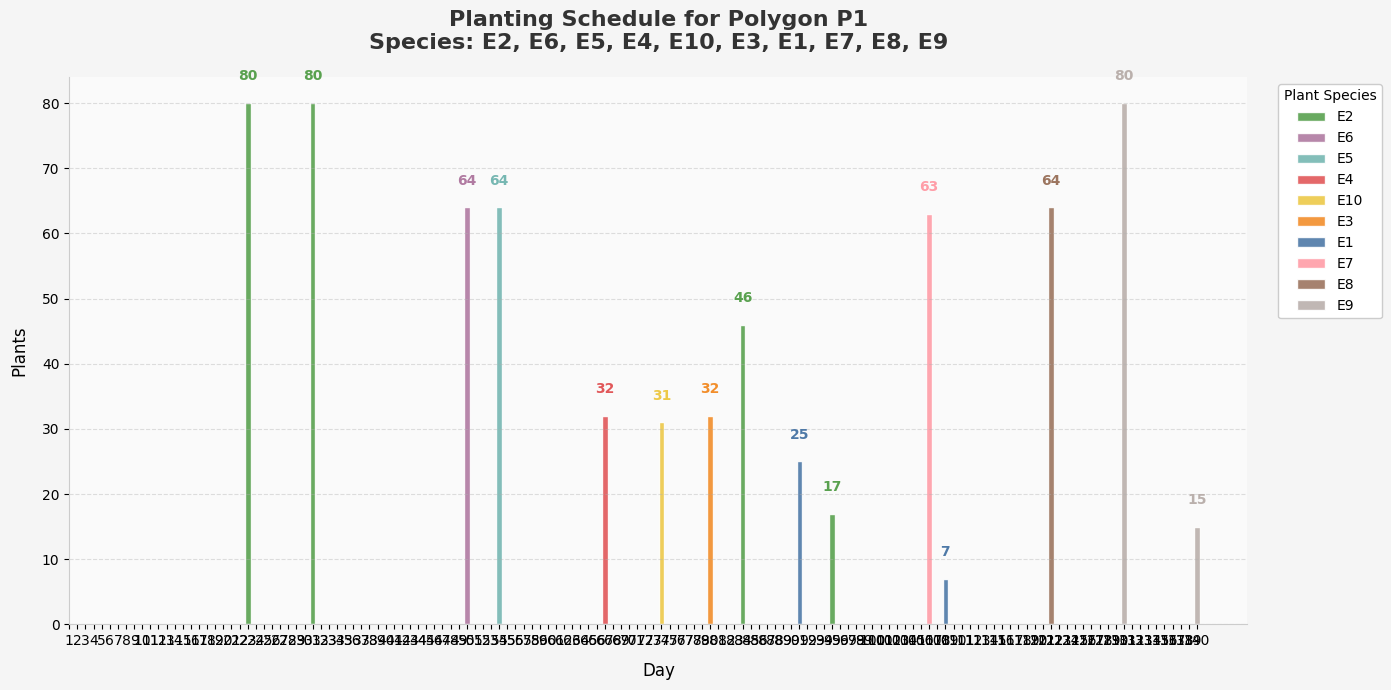

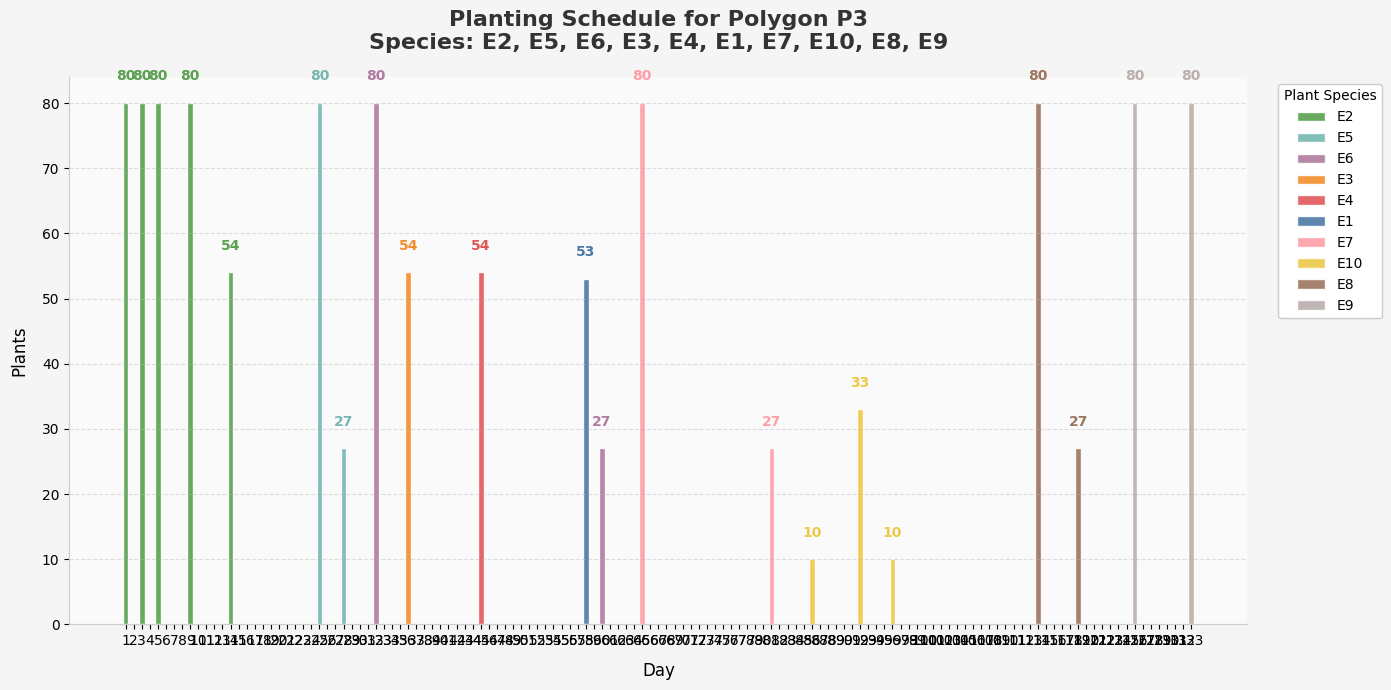

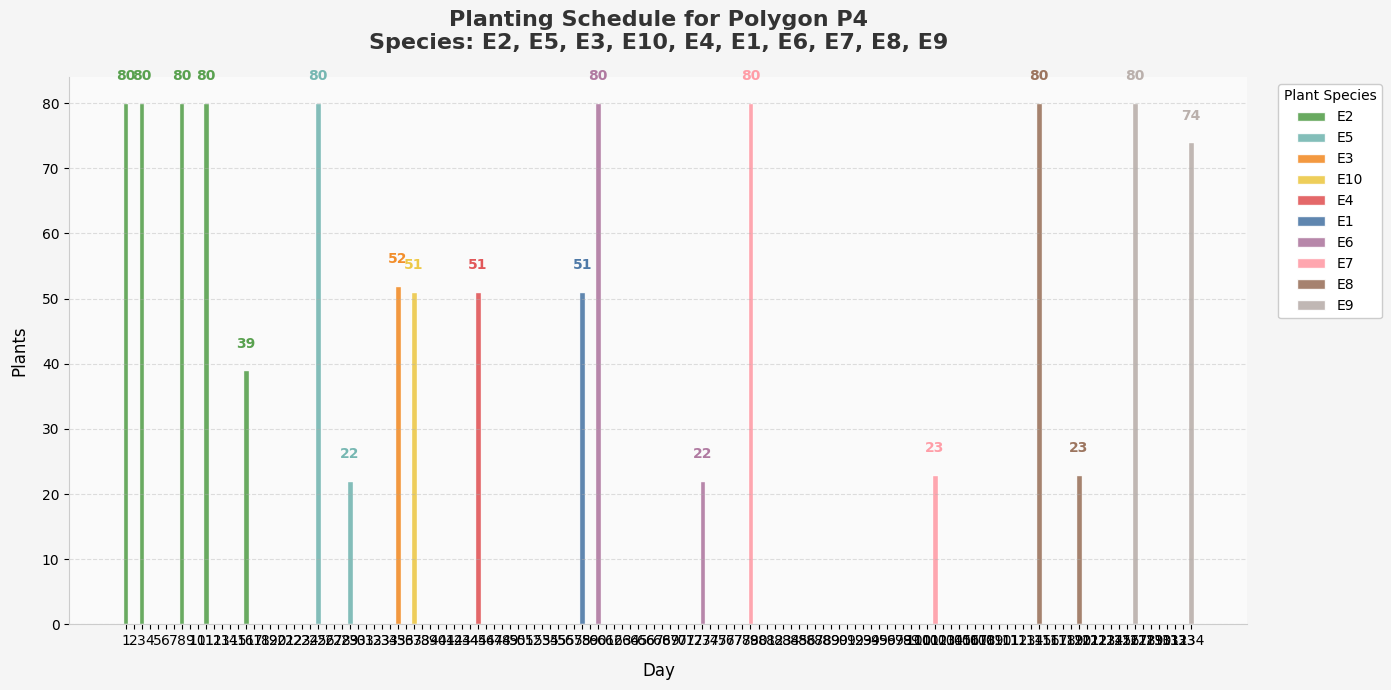

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Color palette for different species (expand as needed)
species_palette = {
    'E1': '#4E79A7',  # Blue
    'E2': '#59A14F',  # Green
    'E3': '#F28E2B',  # Orange
    'E4': '#E15759',  # Red
    'E5': '#76B7B2',  # Teal
    'E6': '#B07AA1',  # Purple
    'E7': '#FF9DA7',  # Pink
    'E8': '#9C755F',  # Brown
    'E9': '#BAB0AC',  # Gray
    'E10': '#EDC948'  # Yellow
}

# List of polygons to iterate over
polygons = ['P10', 'P1', 'P3', 'P4']

# Loop over each polygon
for polygon in polygons:
    # Filter data for current polygon
    polygon_data = planting[planting['polygon'] == polygon]
    
    # Create plot with improved styling
    plt.figure(figsize=(14, 7), facecolor='#f5f5f5')  # Light gray background
    ax = plt.gca()
    ax.set_facecolor('#fafafa')  # Lighter plot area
    
    if not polygon_data.empty:
        # Get unique species in this polygon
        unique_species = polygon_data['plant_type'].unique()
        
        # Plot each species separately (works for single or multiple species)
        for species in unique_species:
            species_data = polygon_data[polygon_data['plant_type'] == species]
            ax.bar(species_data['day'], species_data['quantity'],
                   color=species_palette.get(species, '#999999'),  # Default gray if species not in palette
                   width=0.7,
                   edgecolor='white',
                   linewidth=1,
                   label=species,
                   alpha=0.9)  # Slight transparency
            
            # Add value labels
            for _, row in species_data.iterrows():
                ax.text(row['day'], row['quantity'] + 3, 
                        f"{row['quantity']}",
                        ha='center', va='bottom',
                        fontsize=10,
                        fontweight='bold',
                        color=species_palette.get(species, '#333333'))
        
        # Customize plot appearance
        ax.set_title(f'Planting Schedule for Polygon {polygon}\nSpecies: {", ".join(unique_species)}',
                     fontsize=16, pad=20, fontweight='bold', color='#333333')
        ax.set_xlabel('Day', fontsize=12, labelpad=10)
        ax.set_ylabel('Plants', fontsize=12, labelpad=10)
        
        # Configure axes
        ax.set_xticks(range(1, polygon_data['day'].max() + 1))
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.4)
        
        # Add legend if multiple species
        if len(unique_species) > 1:
            ax.legend(title='Plant Species',
                      bbox_to_anchor=(1.02, 1),
                      loc='upper left',
                      frameon=True,
                      framealpha=1)
        
        # Add decorative elements
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#cccccc')
        ax.spines['bottom'].set_color('#cccccc')
    
    else:
        ax.text(0.5, 0.5, f"No planting data available for Polygon {polygon}",
                ha='center', va='center',
                fontsize=14, color='#666666',
                style='italic')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


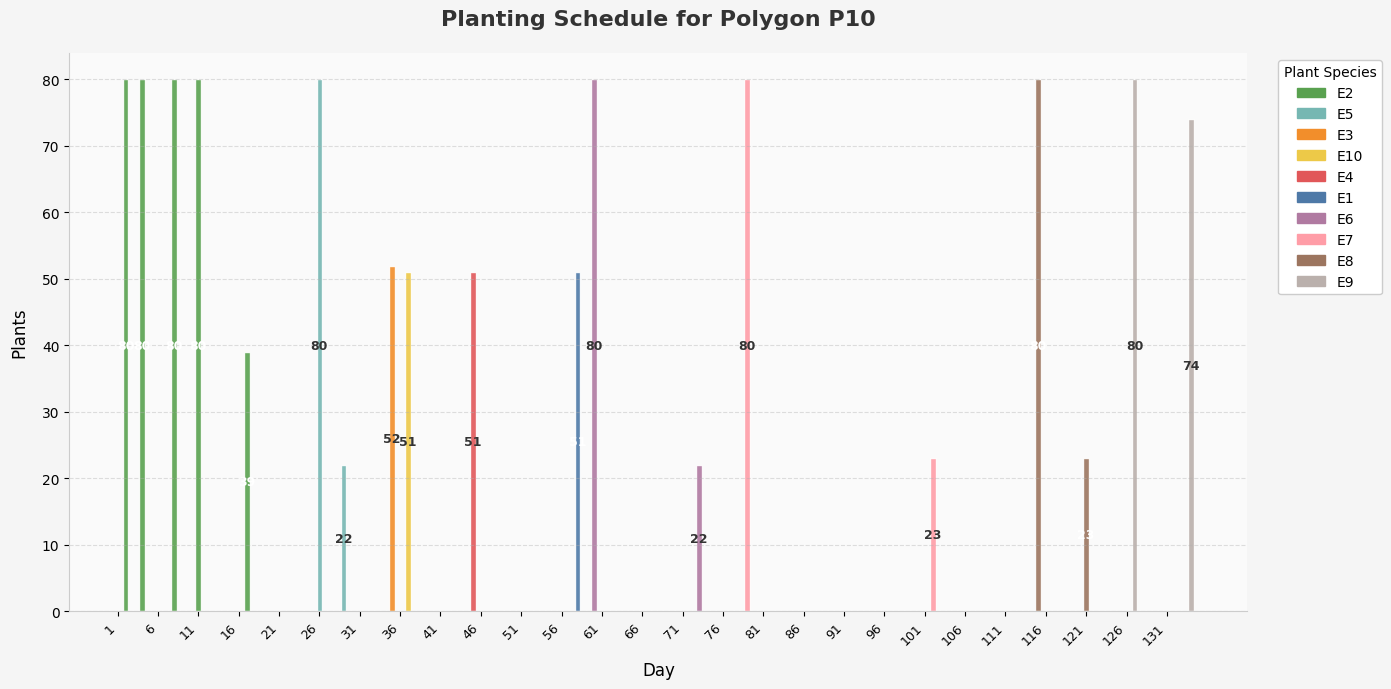

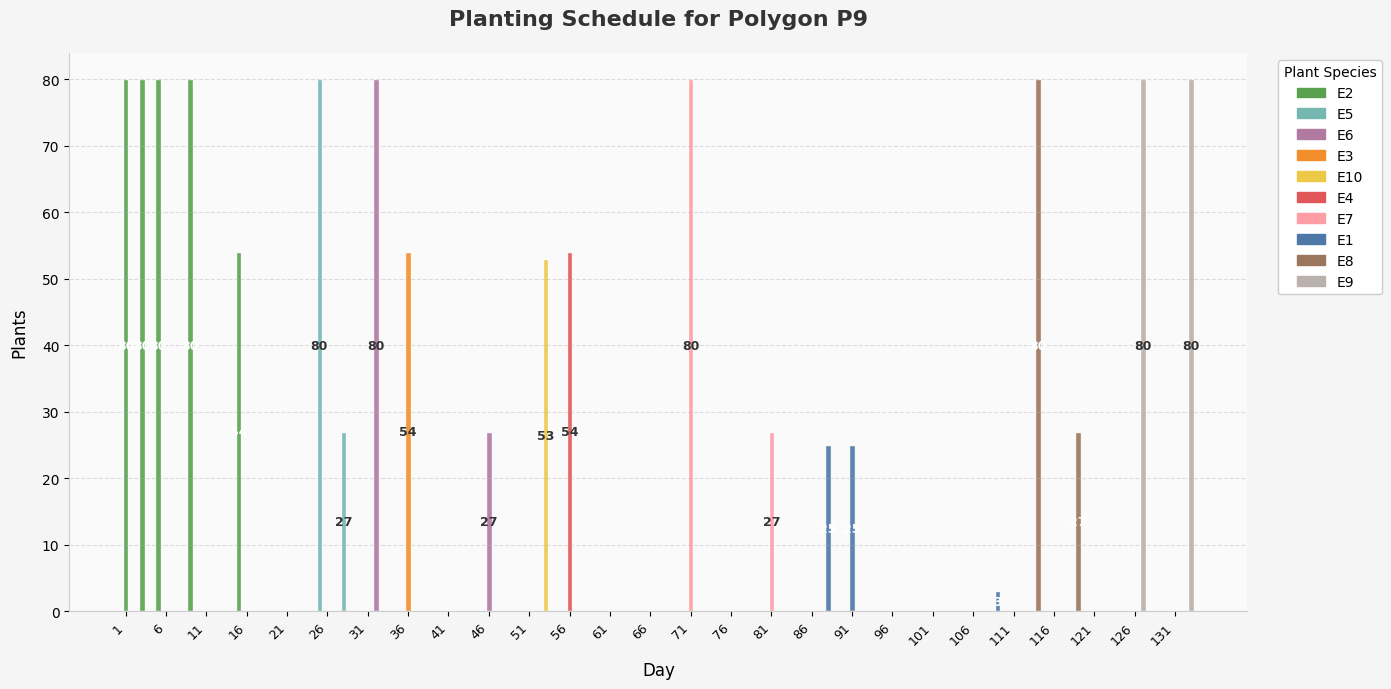

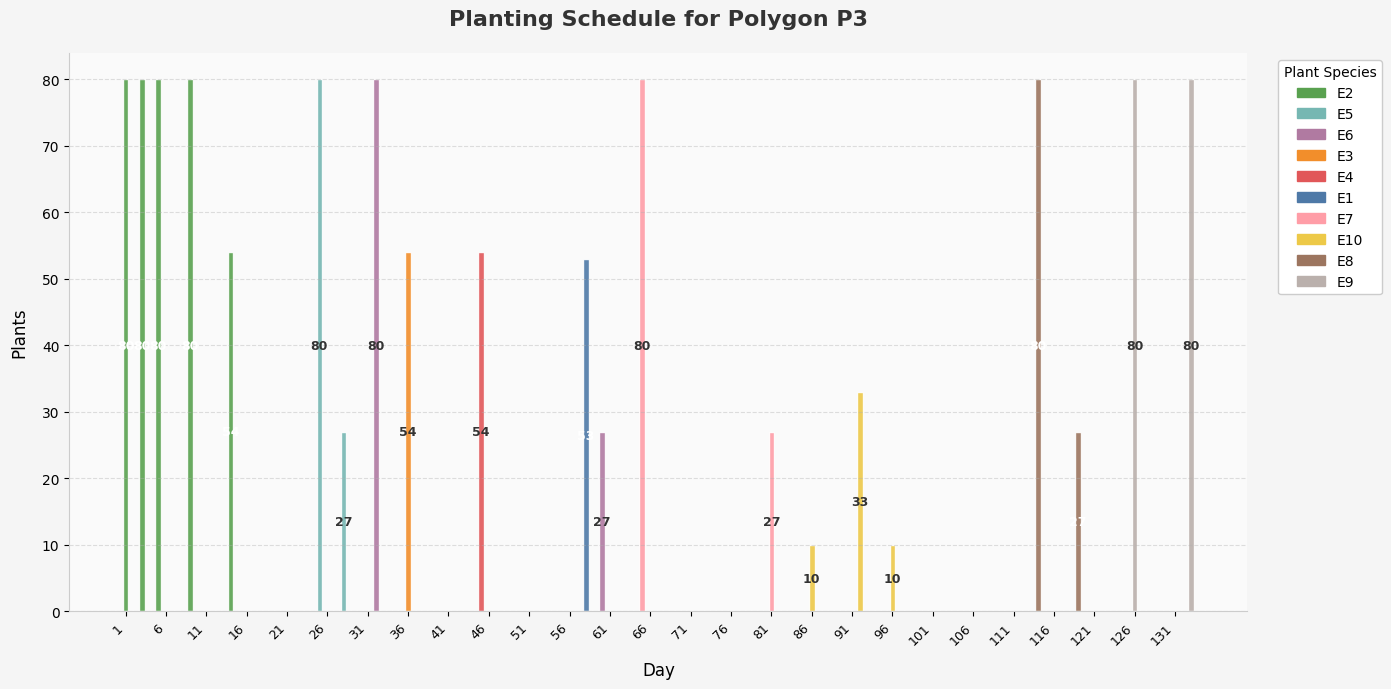

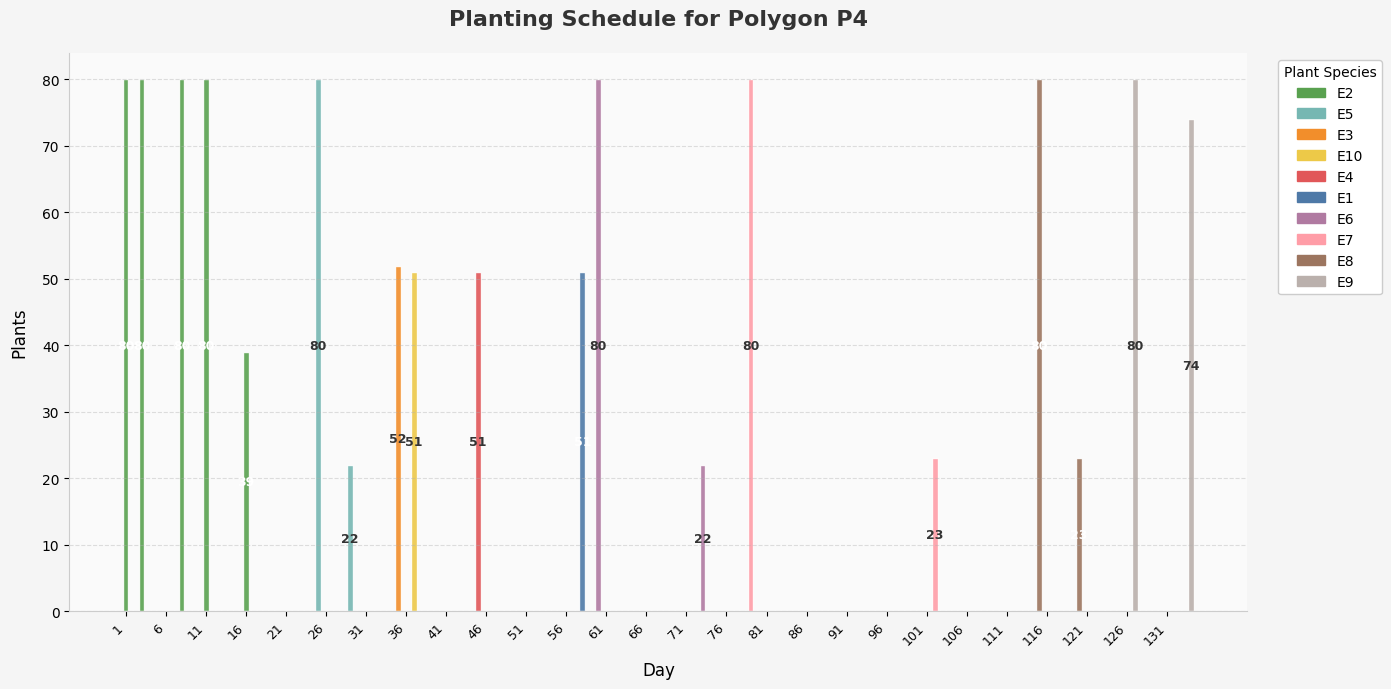

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy for arange

# Dummy 'planting' DataFrame for demonstration purposes
# In your actual use, 'planting' would be loaded from your data source


# Color palette for different species (expand as needed)
species_palette = {
    'E1': '#4E79A7',  # Blue
    'E2': '#59A14F',  # Green
    'E3': '#F28E2B',  # Orange
    'E4': '#E15759',  # Red
    'E5': '#76B7B2',  # Teal
    'E6': '#B07AA1',  # Purple
    'E7': '#FF9DA7',  # Pink
    'E8': '#9C755F',  # Brown
    'E9': '#BAB0AC',  # Gray
    'E10': '#EDC948'  # Yellow
}

# List of polygons to iterate over
polygons = ['P10', 'P9', 'P3', 'P4']


### **Option 1: Separate Plots with Improved X-axis Readability**


for polygon in polygons:
    # Filter data for current polygon
    polygon_data = planting[planting['polygon'] == polygon]

    # Create plot with improved styling
    plt.figure(figsize=(14, 7), facecolor='#f5f5f5')  # Light gray background
    ax = plt.gca()
    ax.set_facecolor('#fafafa')  # Lighter plot area

    if not polygon_data.empty:
        # Get unique species in this polygon
        unique_species = polygon_data['plant_type'].unique()

        # Plot each species separately (works for single or multiple species)
        # Using a list to hold bars for stacked effect if multiple species on same day
        bottom = {} # Dictionary to track the bottom of each bar for stacking
        for species in unique_species:
            species_data = polygon_data[polygon_data['plant_type'] == species]

            for index, row in species_data.iterrows():
                day = row['day']
                quantity = row['quantity']
                current_bottom = bottom.get(day, 0) # Get current bottom for this day, default to 0

                ax.bar(day, quantity,
                       bottom=current_bottom, # Stack bars
                       color=species_palette.get(species, '#999999'),
                       width=0.7,
                       edgecolor='white',
                       linewidth=1,
                       label=species if species not in ax.get_legend_handles_labels()[1] else "", # Add label only once per species
                       alpha=0.9)

                # Add value labels
                ax.text(day, current_bottom + quantity / 2, # Place label in the middle of the bar segment
                        f"{quantity}",
                        ha='center', va='center',
                        fontsize=9,
                        fontweight='bold',
                        color='white' if pd.Series(species_palette.get(species, '#999999')).apply(lambda x: sum(int(x[i:i+2], 16) for i in (1, 3, 5)))[0] < 382 else '#333333') # White text for dark colors, black for light
                bottom[day] = current_bottom + quantity # Update bottom for next stack


        # Customize plot appearance
        ax.set_title(f'Planting Schedule for Polygon {polygon}',
                     fontsize=16, pad=20, fontweight='bold', color='#333333')
        ax.set_xlabel('Day', fontsize=12, labelpad=10)
        ax.set_ylabel('Plants', fontsize=12, labelpad=10)

        # --- IMPROVEMENT: Configure X-axis for better visibility ---
        max_day = polygon_data['day'].max()
        if max_day > 20: # If more than 20 days, show every 5th day
            ax.set_xticks(np.arange(1, max_day + 1, 5))
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9) # Rotate for many ticks
        elif max_day > 10: # If more than 10 days, show every other day
            ax.set_xticks(np.arange(1, max_day + 1, 2))
            plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)
        else: # If 10 or fewer days, show all days
            ax.set_xticks(np.arange(1, max_day + 1, 1))
            plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)


        ax.tick_params(axis='y', which='major', labelsize=10) # Y-axis labels
        ax.grid(axis='y', linestyle='--', alpha=0.4)

        # Add legend if multiple species
        if len(unique_species) > 1:
            # Create custom legend handles to avoid duplicates from stacked bars
            handles = [plt.Rectangle((0,0),1,1, color=species_palette.get(s, '#999999')) for s in unique_species]
            labels = unique_species.tolist()
            ax.legend(handles=handles, labels=labels, title='Plant Species',
                      bbox_to_anchor=(1.02, 1),
                      loc='upper left',
                      frameon=True,
                      framealpha=1)

        # Add decorative elements
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#cccccc')
        ax.spines['bottom'].set_color('#cccccc')

    else:
        ax.text(0.5, 0.5, f"No planting data available for Polygon {polygon}",
                ha='center', va='center',
                fontsize=14, color='#666666',
                style='italic')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

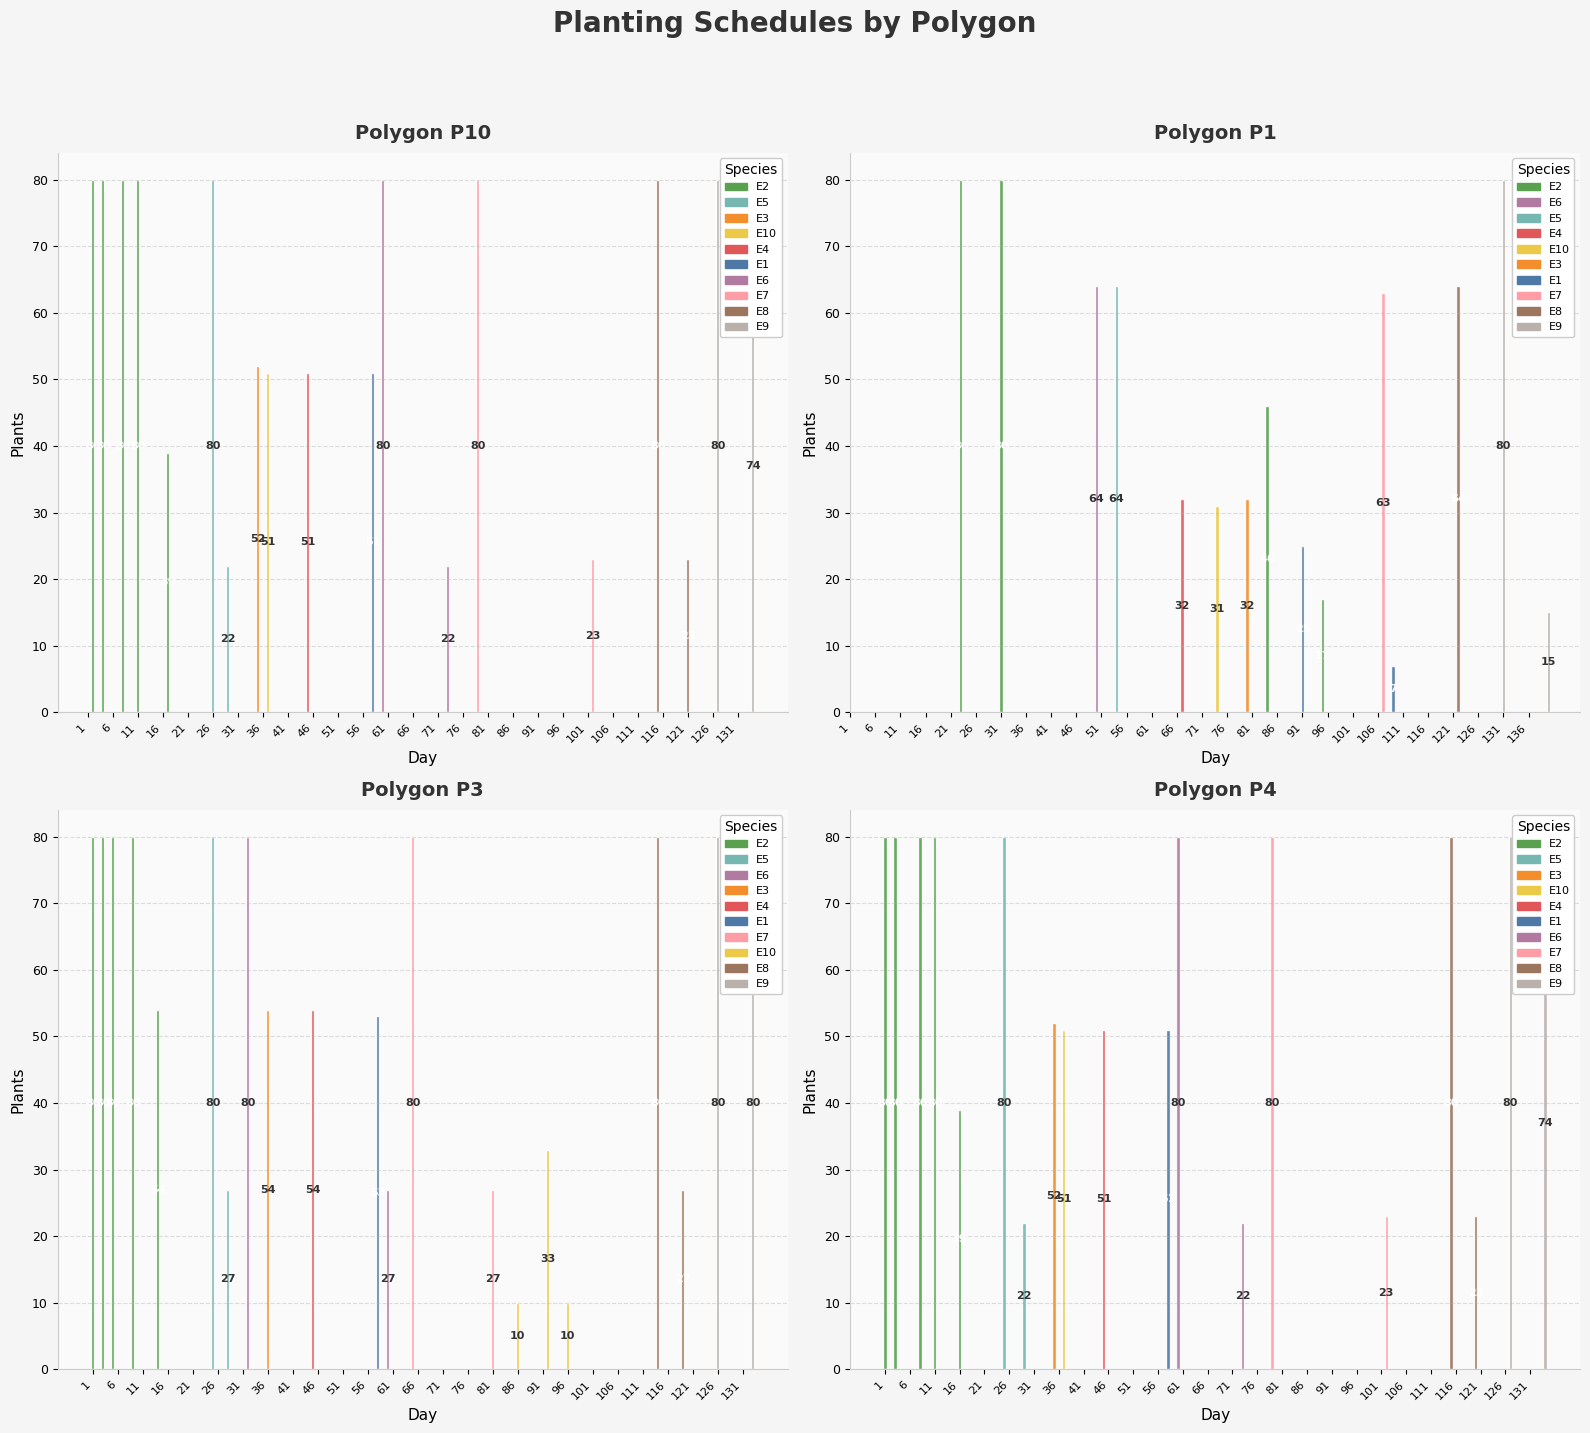

In [9]:
# --- Combined Plot using Subplots ---
# Determine grid size (e.g., 2x2 for 4 polygons)
num_polygons = len(polygons)
nrows = int(np.ceil(num_polygons / 2)) # Adjust as needed
ncols = 2 # Or adjust based on desired layout

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 7 * nrows), facecolor='#f5f5f5')
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

fig.suptitle('Planting Schedules by Polygon', fontsize=20, fontweight='bold', color='#333333', y=1.02) # Main title for the figure

for i, polygon in enumerate(polygons):
    ax = axes[i] # Get the current subplot axis
    polygon_data = planting[planting['polygon'] == polygon]
    ax.set_facecolor('#fafafa') # Lighter plot area for subplots

    if not polygon_data.empty:
        unique_species = polygon_data['plant_type'].unique()
        bottom = {} # Dictionary to track the bottom of each bar for stacking

        for species in unique_species:
            species_data = polygon_data[polygon_data['plant_type'] == species]
            for index, row in species_data.iterrows():
                day = row['day']
                quantity = row['quantity']
                current_bottom = bottom.get(day, 0)

                ax.bar(day, quantity,
                       bottom=current_bottom,
                       color=species_palette.get(species, '#999999'),
                       width=0.7,
                       edgecolor='white',
                       linewidth=1,
                       label=species if species not in ax.get_legend_handles_labels()[1] else "",
                       alpha=0.9)

                # Add value labels
                ax.text(day, current_bottom + quantity / 2,
                        f"{quantity}",
                        ha='center', va='center',
                        fontsize=8,
                        fontweight='bold',
                        color='white' if pd.Series(species_palette.get(species, '#999999')).apply(lambda x: sum(int(x[i:i+2], 16) for i in (1, 3, 5)))[0] < 382 else '#333333')
                bottom[day] = current_bottom + quantity


        ax.set_title(f'Polygon {polygon}', fontsize=14, fontweight='bold', color='#333333', pad=10)
        ax.set_xlabel('Day', fontsize=11, labelpad=5)
        ax.set_ylabel('Plants', fontsize=11, labelpad=5)

        # --- IMPROVEMENT: Configure X-axis for better visibility in subplots ---
        max_day = polygon_data['day'].max()
        if max_day > 20:
            ax.set_xticks(np.arange(1, max_day + 1, 5))
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
        elif max_day > 10:
            ax.set_xticks(np.arange(1, max_day + 1, 2))
            plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=9)
        else:
            ax.set_xticks(np.arange(1, max_day + 1, 1))
            plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=9)

        ax.tick_params(axis='y', which='major', labelsize=9)
        ax.grid(axis='y', linestyle='--', alpha=0.4)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#cccccc')
        ax.spines['bottom'].set_color('#cccccc')

        if len(unique_species) > 1:
            handles = [plt.Rectangle((0,0),1,1, color=species_palette.get(s, '#999999')) for s in unique_species]
            labels = unique_species.tolist()
            ax.legend(handles=handles, labels=labels, title='Species', loc='upper right', fontsize=8, frameon=True, framealpha=1)

    else:
        ax.text(0.5, 0.5, f"No planting data for {polygon}", ha='center', va='center',
                fontsize=12, color='#666666', style='italic', transform=ax.transAxes)
        ax.axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for suptitle
plt.show()

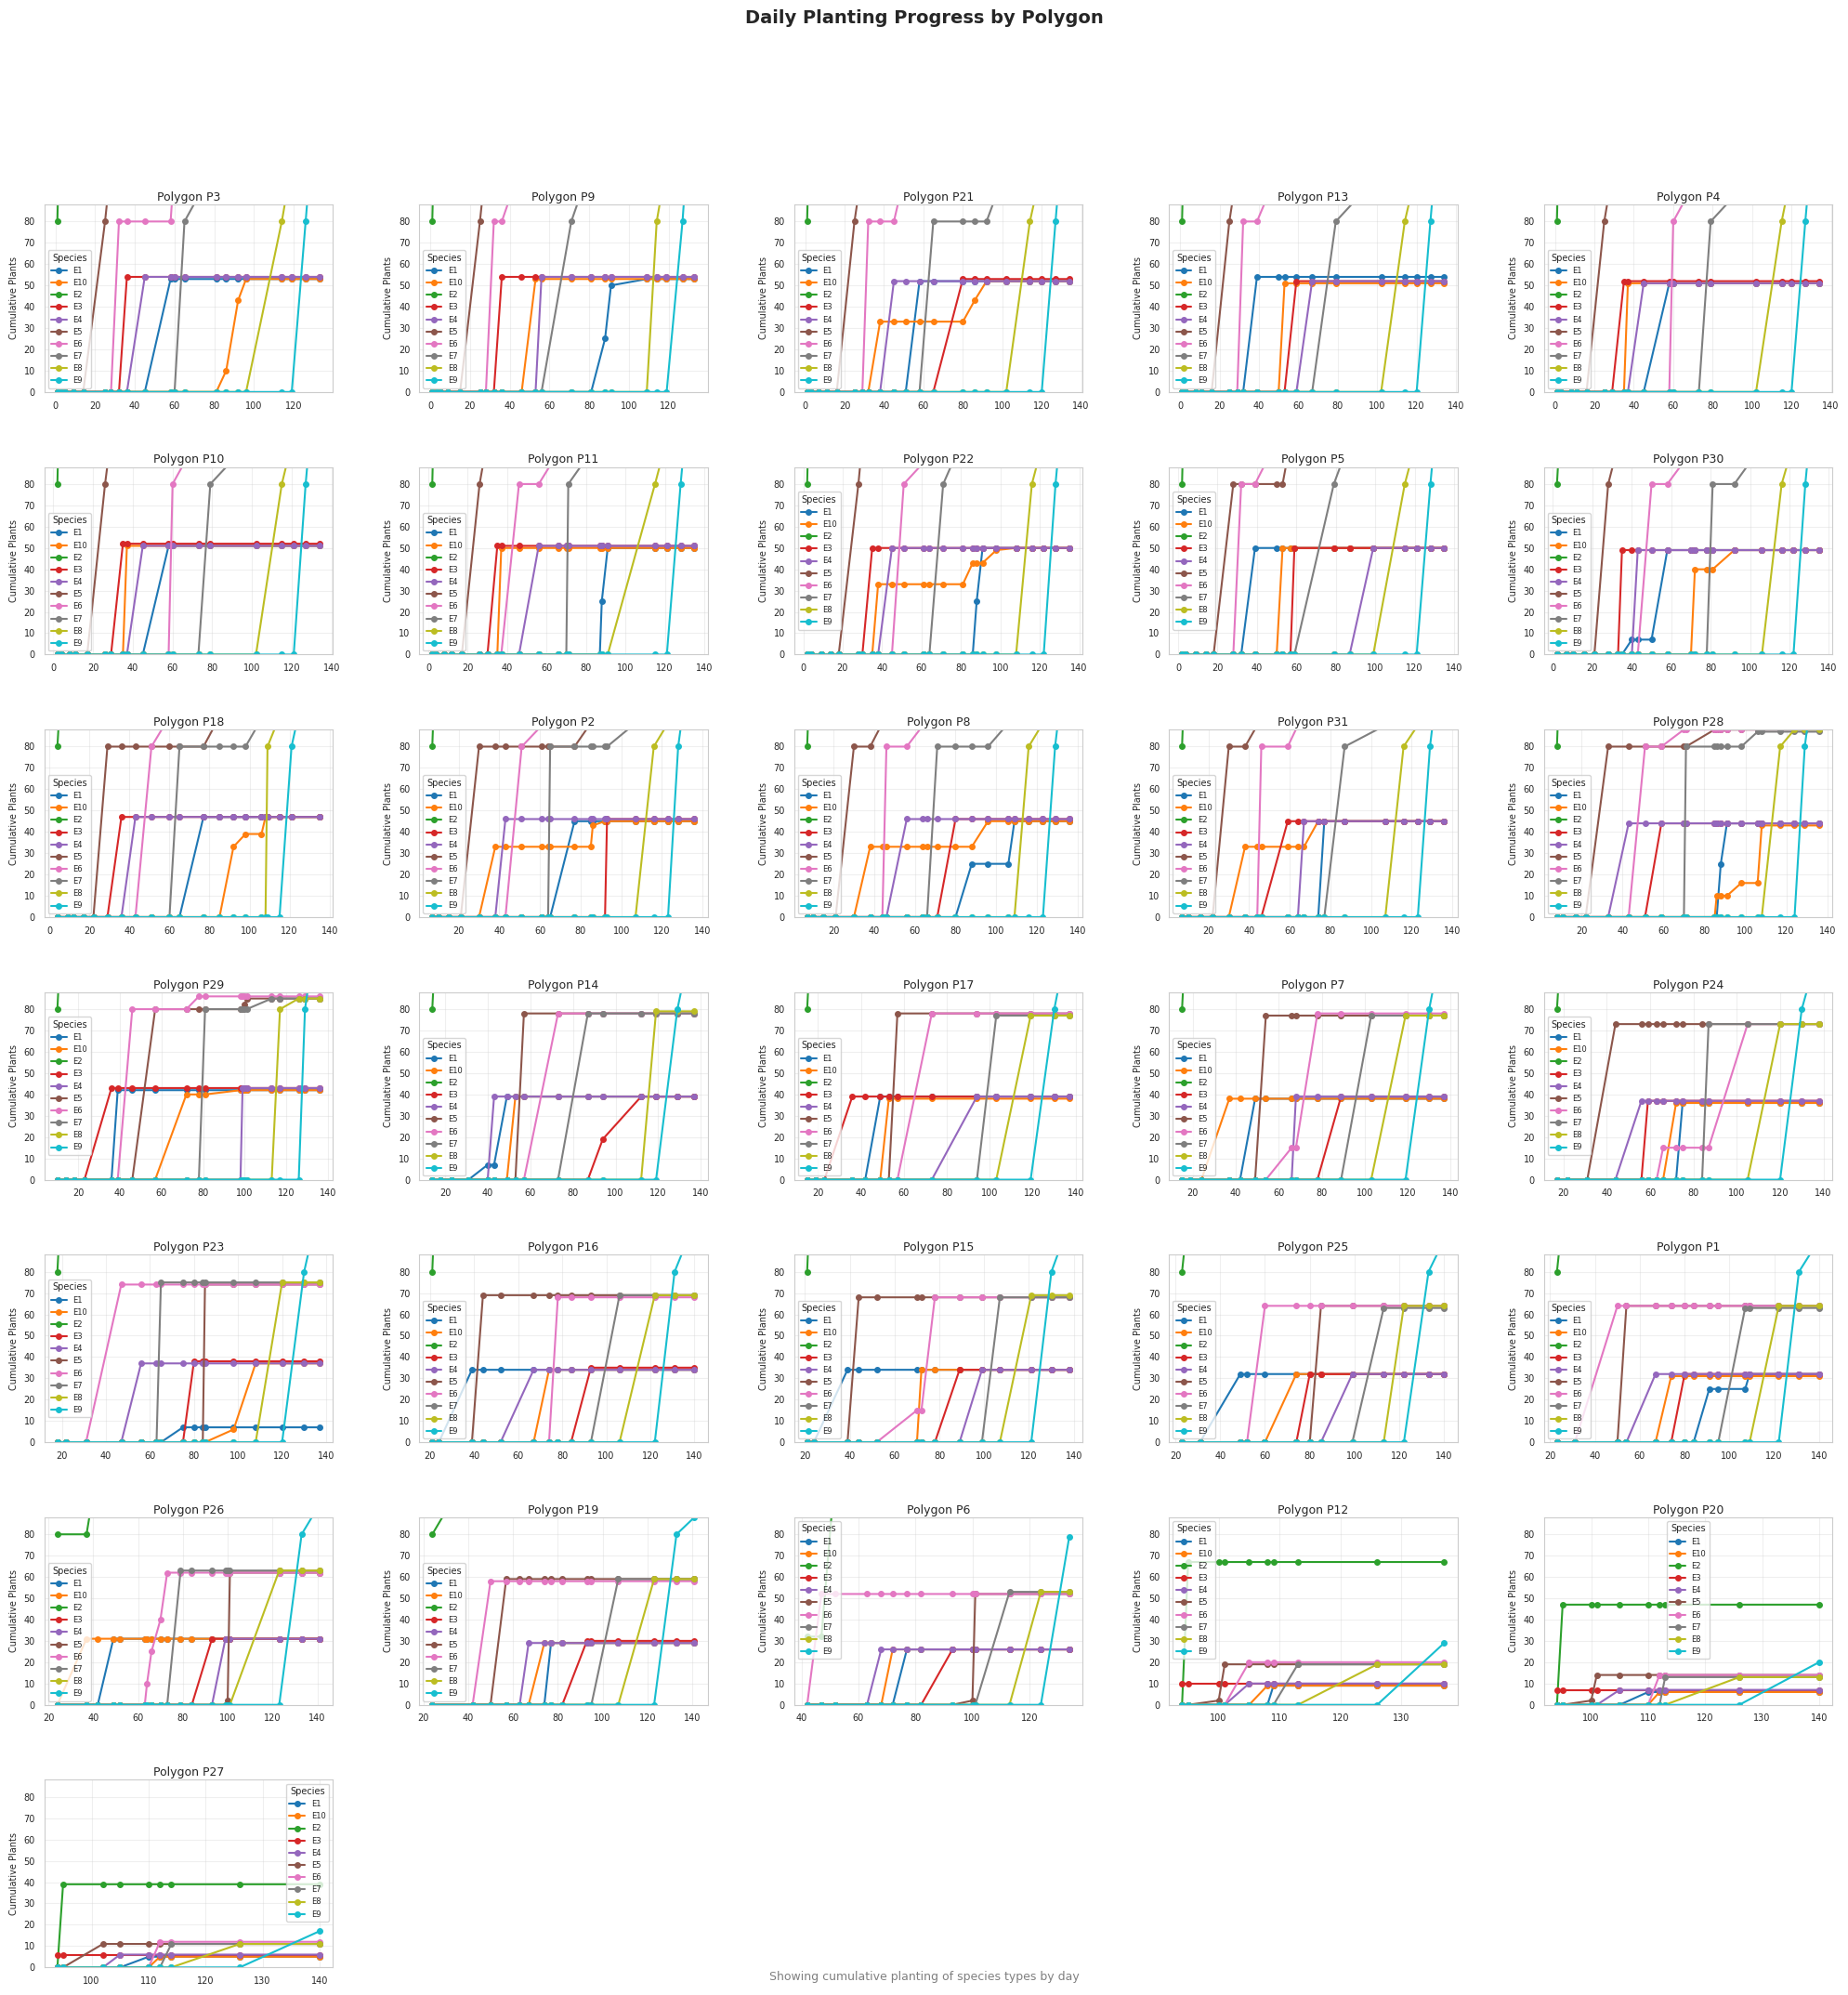

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Get unique polygons and calculate grid size
polygons = df['polygon'].unique()
n_polygons = len(polygons)
cols = 5  # Number of columns in grid
rows = math.ceil(n_polygons / cols)

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(20, 3*rows), dpi=100)
fig.suptitle('Daily Planting Progress by Polygon', y=1.02, fontsize=14, fontweight='bold')

# Plot each polygon
for i, polygon in enumerate(polygons):
    ax = axes.flatten()[i]
    poly_data = df[df['polygon'] == polygon]
    
    # Create cumulative sum by day
    poly_data = poly_data.groupby(['day', 'plant_type'])['quantity'].sum().unstack().fillna(0)
    poly_data = poly_data.cumsum()  # Cumulative planting
    
    # Plot
    poly_data.plot(kind='line', ax=ax, marker='o', markersize=4, linewidth=1.5)
    
    # Customize subplot
    ax.set_title(f'Polygon {polygon}', fontsize=9, pad=3)
    ax.set_xlabel('')
    ax.set_ylabel('Cumulative Plants', fontsize=7)
    ax.tick_params(labelsize=7)
    ax.legend(title='Species', fontsize=6, title_fontsize=7)
    ax.grid(True, alpha=0.3)
    
    # Set consistent y-axis limits for comparison
    ax.set_ylim(0, df['quantity'].max() * 1.1)

# Hide empty subplots
for j in range(i+1, rows*cols):
    axes.flatten()[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)

# Add footer
plt.figtext(0.5, 0.01, "Showing cumulative planting of species types by day", 
            ha="center", fontsize=9, color='gray')

plt.show()

In [2]:
# Summary statistics
summary_stats = merged_data.describe()
print(summary_stats)

# Trends over time
trends = merged_data.groupby('day').agg({'quantity_orders': 'sum', 'quantity_planting': 'sum'}).reset_index()
print(trends)

              day  quantity_orders  arrival_day  quantity_planting
count   22.000000        22.000000    22.000000          22.000000
mean    66.863636       177.136364    67.863636          31.681818
std     36.728470       141.321415    36.728470          33.009936
min     12.000000         5.000000    13.000000           2.000000
25%     22.000000        41.000000    23.000000           3.500000
50%     64.000000       161.000000    65.000000          16.500000
75%    100.000000       342.000000   101.000000          73.750000
max    109.000000       400.000000   110.000000          80.000000
   day  quantity_orders  quantity_planting
0   12              800                160
1   22             1710                311
2   64               25                 42
3  100              805                 10
4  102              548                 94
5  109                9                 80


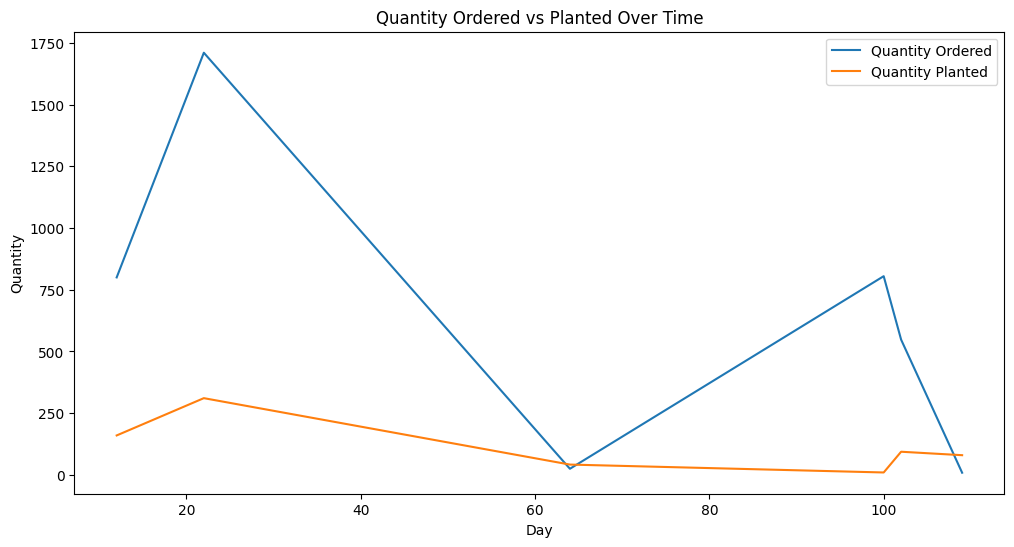

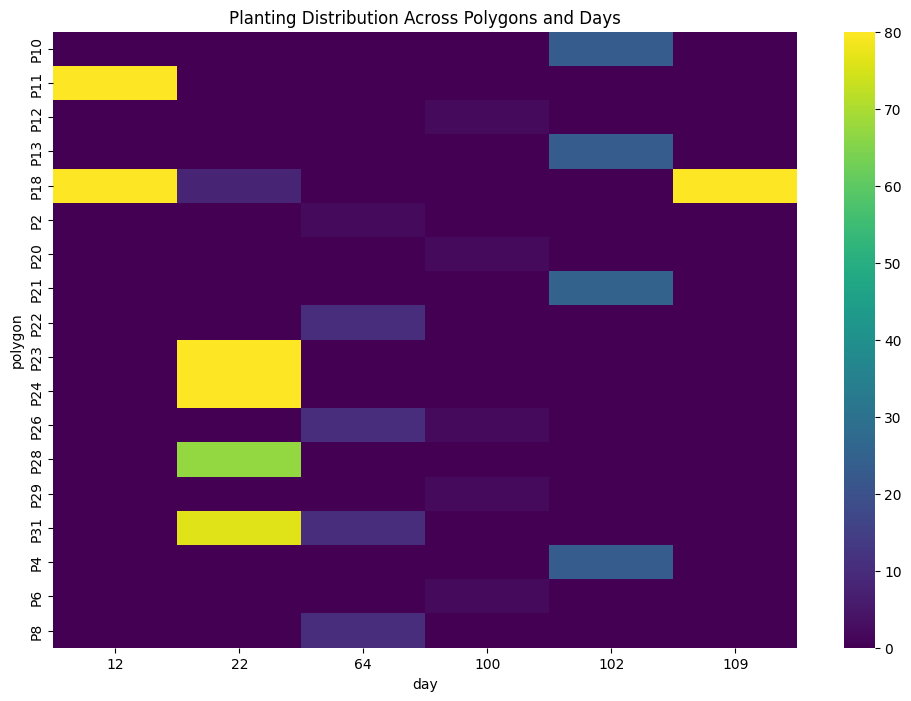

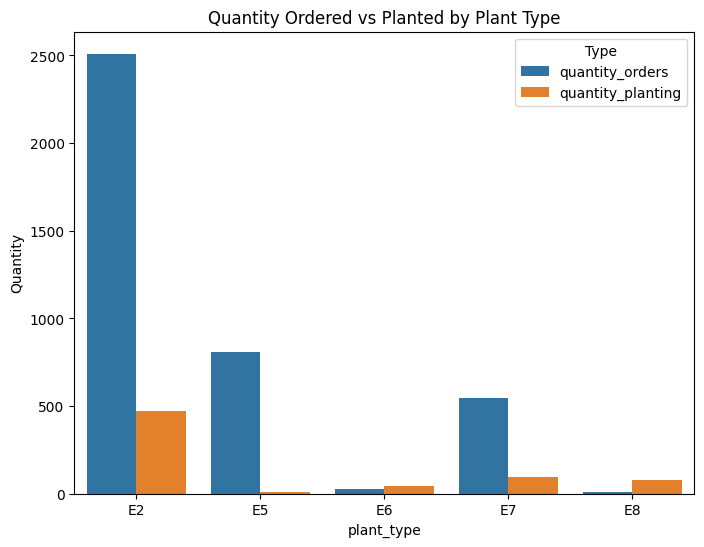

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(trends['day'], trends['quantity_orders'], label='Quantity Ordered')
plt.plot(trends['day'], trends['quantity_planting'], label='Quantity Planted')
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Quantity Ordered vs Planted Over Time')
plt.legend()
plt.show()

# Heatmap of planting distribution
heatmap_data = merged_data.pivot_table(index='polygon', columns='day', values='quantity_planting', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Planting Distribution Across Polygons and Days')
plt.show()

# Bar chart of plant types
plant_type_summary = merged_data.groupby('plant_type').agg({'quantity_orders': 'sum', 'quantity_planting': 'sum'}).reset_index()
melted = plant_type_summary.melt(id_vars='plant_type', var_name='Type', value_name='Quantity')
plt.figure(figsize=(8, 6))
sns.barplot(data=melted, x='plant_type', y='Quantity', hue='Type')
plt.title('Quantity Ordered vs Planted by Plant Type')
plt.show()

In [6]:
import pandas as pd

# Load the data
orders = pd.read_csv('heuristic_orders.csv')
planting = pd.read_csv('heuristic_planting.csv')

# Merge the data on 'day' and 'plant_type'
merged_data = pd.merge(orders, planting, on=['day', 'plant_type'], suffixes=('_orders', '_planting'))

# Display the first few rows of the merged data
print(merged_data.head())

   day nursery plant_type  quantity_orders  arrival_day polygon  \
0   12      V4         E2              400           13     P11   
1   12      V4         E2              400           13     P18   
2   22      V4         E2              342           23     P31   
3   22      V4         E2              342           23     P28   
4   22      V4         E2              342           23     P24   

   quantity_planting  
0                 80  
1                 80  
2                 76  
3                 67  
4                 80  


In [7]:
# Polygon utilization
polygon_summary = merged_data.groupby('polygon').agg({'quantity_planting': 'sum'}).reset_index()
polygon_summary = polygon_summary.sort_values(by='quantity_planting', ascending=False)
print(polygon_summary)

# Plant type distribution in each polygon
plant_type_polygon_summary = merged_data.groupby(['polygon', 'plant_type']).agg({'quantity_planting': 'sum'}).reset_index()
print(plant_type_polygon_summary)

   polygon  quantity_planting
4      P18                168
14     P31                 86
9      P23                 80
1      P11                 80
10     P24                 80
12     P28                 67
7      P21                 25
15      P4                 23
0      P10                 23
3      P13                 23
11     P26                 12
8      P22                 10
17      P8                 10
6      P20                  2
5       P2                  2
13     P29                  2
2      P12                  2
16      P6                  2
   polygon plant_type  quantity_planting
0      P10         E7                 23
1      P11         E2                 80
2      P12         E5                  2
3      P13         E7                 23
4      P18         E2                 88
5      P18         E8                 80
6       P2         E6                  2
7      P20         E5                  2
8      P21         E7                 25
9      P22         E

In [8]:
# Daily planting trends
daily_trends = merged_data.groupby('day').agg({'quantity_planting': 'sum'}).reset_index()
print(daily_trends)

# Plant type trends over time
plant_type_trends = merged_data.groupby(['day', 'plant_type']).agg({'quantity_planting': 'sum'}).reset_index()
print(plant_type_trends)

   day  quantity_planting
0   12                160
1   22                311
2   64                 42
3  100                 10
4  102                 94
5  109                 80
   day plant_type  quantity_planting
0   12         E2                160
1   22         E2                311
2   64         E6                 42
3  100         E5                 10
4  102         E7                 94
5  109         E8                 80


In [9]:
# Order vs. planting consistency
consistency_summary = merged_data.groupby(['day', 'plant_type']).agg({'quantity_orders': 'sum', 'quantity_planting': 'sum'}).reset_index()
consistency_summary['difference'] = consistency_summary['quantity_orders'] - consistency_summary['quantity_planting']
print(consistency_summary)

   day plant_type  quantity_orders  quantity_planting  difference
0   12         E2              800                160         640
1   22         E2             1710                311        1399
2   64         E6               25                 42         -17
3  100         E5              805                 10         795
4  102         E7              548                 94         454
5  109         E8                9                 80         -71


In [10]:
# Nursery utilization
nursery_summary = orders.groupby('nursery').agg({'quantity': 'sum'}).reset_index()
nursery_summary = nursery_summary.sort_values(by='quantity', ascending=False)
print(nursery_summary)

  nursery  quantity
3      V4      9686
2      V3      6082
1      V2      6076
0      V1      4845


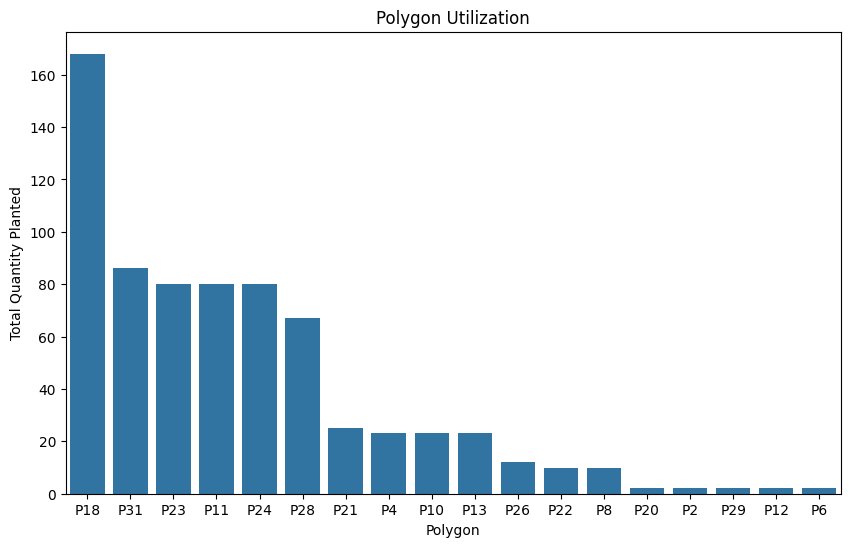

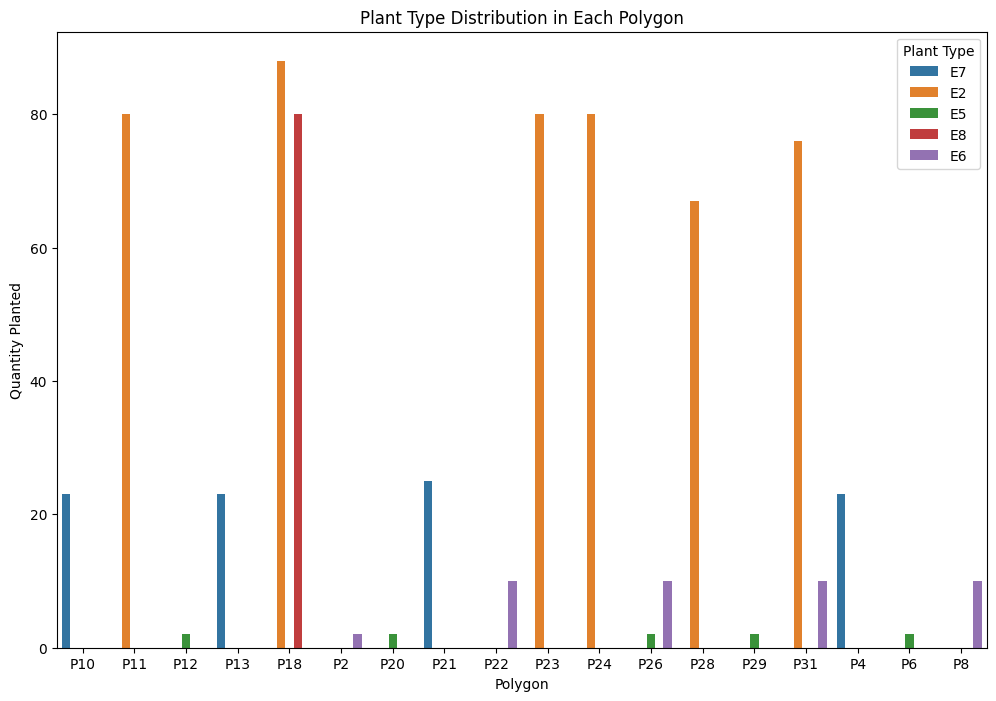

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Polygon utilization bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='polygon', y='quantity_planting', data=polygon_summary)
plt.title('Polygon Utilization')
plt.xlabel('Polygon')
plt.ylabel('Total Quantity Planted')
plt.show()

# Plant type distribution in each polygon
plt.figure(figsize=(12, 8))
sns.barplot(x='polygon', y='quantity_planting', hue='plant_type', data=plant_type_polygon_summary)
plt.title('Plant Type Distribution in Each Polygon')
plt.xlabel('Polygon')
plt.ylabel('Quantity Planted')
plt.legend(title='Plant Type')
plt.show()

#   Orders

In [ ]:
orders = pd.read_csv('/Users/samanthabritoozuna/Desktop/Orders/heuristic 2/heuristic_orders.csv')


In [ ]:
species_palette = {
    'E1': '#4E79A7',  # Blue
    'E2': '#59A14F',  # Green
    'E3': '#F28E2B',  # Orange
    'E4': '#E15759',  # Red
    'E5': '#76B7B2',  # Teal
    'E6': '#B07AA1',  # Purple
    'E7': '#FF9DA7',  # Pink
    'E8': '#9C755F',  # Brown
    'E9': '#BAB0AC',  # Gray
    'E10': '#EDC948'  # Yellow
}

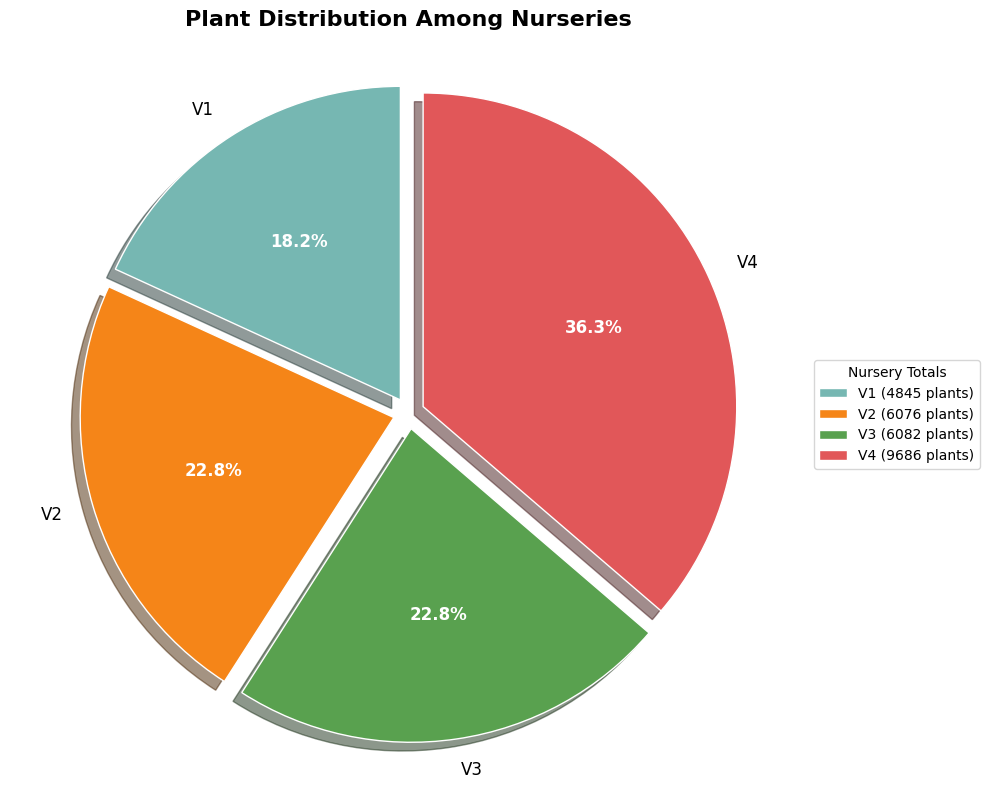

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual DataFrame)


# Aggregate quantities by nursery
nursery_totals = orders.groupby('nursery')['quantity'].sum()

# Create pie chart
plt.figure(figsize=(10, 8), facecolor='white')

# Custom colors for nurseries
colors = ['#76B7B2', '#F58518', '#59A14F', '#E15759']
explode = (0.05, 0.05, 0.05, 0.05)  # Slight separation between slices

# Plot with enhanced styling
wedges, texts, autotexts = plt.pie(
    nursery_totals,
    labels=nursery_totals.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Improve percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add title and legend
plt.title('Plant Distribution Among Nurseries', 
          pad=20, fontsize=16, fontweight='bold')

# Add quantity information in legend
legend_labels = [f'{nursery} ({quantity} plants)' 
                 for nursery, quantity in zip(nursery_totals.index, nursery_totals)]
plt.legend(wedges, legend_labels,
           title="Nursery Totals",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')

plt.tight_layout()
plt.show()

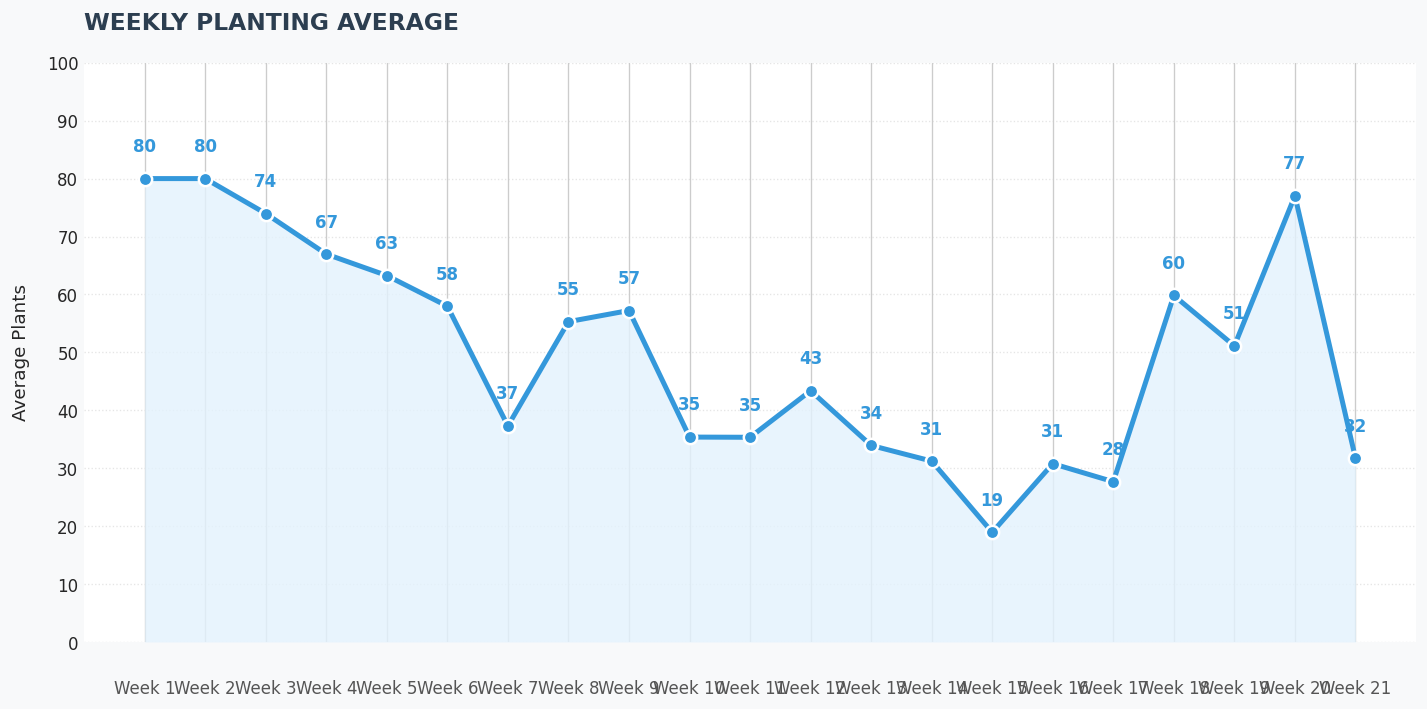

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Prepare data - using your 'planting' DataFrame
df['date'] = pd.to_datetime('2025-06-01') + pd.to_timedelta(df['day'] - 1, unit='D')
weekly_data = df.resample('W-Mon', on='date')['quantity'].mean().reset_index()

# Create figure
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')

# Custom color palette
main_color = '#3498db'  # Vibrant blue
fill_color = '#e3f2fd'  # Light blue fill

# Plot weekly average as area chart
ax.fill_between(weekly_data['date'], 
                weekly_data['quantity'],
                color=fill_color,
                alpha=0.8,
                linewidth=0)

# Plot main line
ax.plot(weekly_data['date'], weekly_data['quantity'],
        marker='o',
        markersize=8,
        markerfacecolor=main_color,
        markeredgecolor='white',
        markeredgewidth=1.5,
        color=main_color,
        linewidth=3,
        label='Weekly Average')

# Customize x-axis (hide day labels)
ax.xaxis.set_major_formatter(plt.NullFormatter())  # Remove date labels
ax.set_xticks(weekly_data['date'])  # Keep tick positions

# Add week numbers instead of dates
for i, (date, qty) in enumerate(zip(weekly_data['date'], weekly_data['quantity'])):
    ax.text(date, -0.08*weekly_data['quantity'].max(), 
            f"Week {i+1}",
            ha='center', va='top',
            fontsize=10, color='#555555')

# Customize y-axis
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0, weekly_data['quantity'].max() * 1.25)

# Add value labels above points
for date, qty in zip(weekly_data['date'], weekly_data['quantity']):
    ax.text(date, qty + 0.05*weekly_data['quantity'].max(), 
            f"{qty:.0f}",
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            color=main_color)

# Title and labels
ax.set_title('WEEKLY PLANTING AVERAGE', 
             pad=20, fontsize=14, fontweight='bold',
             loc='left', color='#2c3e50')
ax.set_ylabel('Average Plants', labelpad=10, fontsize=11)

# Remove spines and grid
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle=':', alpha=0.5)

# Add subtle horizontal line at y=0
ax.axhline(y=0, color='#cccccc', linewidth=0.5)

plt.tight_layout()
plt.show()

In [18]:
orders

,day,nursery,plant_type,quantity,arrival_day,date
0,0,V4,E2,6400,1,2025-05-31
1,2,V1,E9,400,3,2025-06-02
2,3,V1,E9,400,4,2025-06-03
3,4,V1,E9,400,5,2025-06-04
4,5,V1,E9,400,6,2025-06-05
...,...,...,...,...,...,...
98,108,V2,E3,43,109,2025-09-16
99,108,V3,E6,12,109,2025-09-16
100,109,V3,E6,14,110,2025-09-17
101,109,V3,E8,9,110,2025-09-17


In [ ]:
df_after_drop = df.drop(index=1)


Promedio semanal de plantas por tipo de vivero:
nursery        V1          V2          V3     V4
date                                            
2025-06-02  400.0         NaN         NaN    NaN
2025-06-09  400.0  400.000000  280.000000    NaN
2025-06-16  160.0  387.000000  387.000000  400.0
2025-06-23  313.0  224.500000  307.500000  342.0
2025-06-30  227.0  389.000000  400.000000  173.0
2025-07-07  254.0  377.500000  189.500000  237.0
2025-07-14  158.0  165.000000  151.000000  221.0
2025-07-21  347.0  258.000000  201.500000  186.0
2025-07-28  344.0  349.500000  186.000000  225.0
2025-08-04    NaN  228.000000   79.000000  265.0
2025-08-11  125.5         NaN  285.666667   65.0
2025-08-18  176.0  174.333333   43.000000  222.0
2025-08-25  171.5  161.000000  383.000000  201.0
2025-09-01   73.0  179.000000  119.000000   87.5
2025-09-08  131.5   93.500000   22.000000   98.5
2025-09-15  107.0  137.000000   70.200000   17.5
2025-09-22    2.0   43.000000   11.666667   78.0


El tipo de planta m

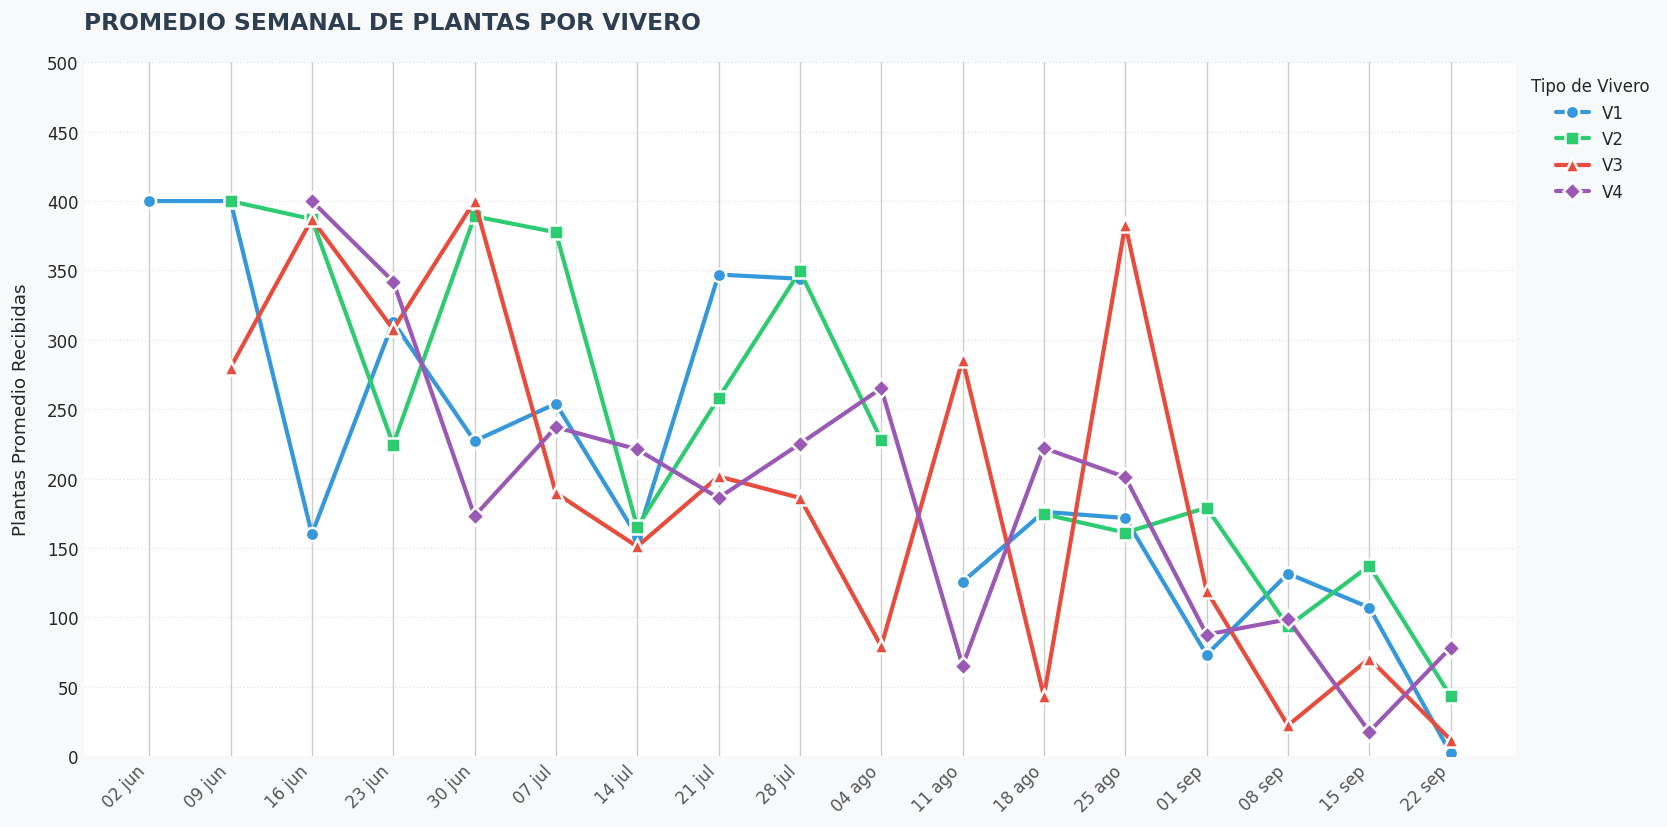

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import locale

# Set locale to Spanish for date formatting
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'



# Ensure 'date' column is datetime
orders_df=orders
orders_df=orders_df.drop(index=0)

nursery_rename_map = {
    'V1': 'Vivero',
    'V2': 'Moctezuma',
    'V3': 'Venado',
    'V4': 'Laguna Seca'
    # Add more mappings if you have V5, V6, etc.
}

# 1. Average of plants that arrive each week by type of nursery
weekly_avg_by_nursery = orders_df.groupby([pd.Grouper(key='date', freq='W-Mon'), 'nursery'])['quantity'].mean().unstack()

print("Promedio semanal de plantas por tipo de vivero:")
print(weekly_avg_by_nursery)
print("\n" + "="*50 + "\n")

# 2. Most frequent plant_type
most_frequent_plant_type = orders_df['plant_type'].mode()[0]
print(f"El tipo de planta más frecuente es: '{most_frequent_plant_type}'")
print("\n" + "="*50 + "\n")

# --- Visualizing the weekly average by nursery type ---
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')

# Plot each nursery type's weekly average
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f1c40f'] # Custom color palette
markers = ['o', 's', '^', 'D', 'P'] # Different markers for clarity

for i, col in enumerate(weekly_avg_by_nursery.columns):
    ax.plot(weekly_avg_by_nursery.index, weekly_avg_by_nursery[col],
            marker=markers[i % len(markers)],
            markersize=8,
            markerfacecolor=colors[i % len(colors)],
            markeredgecolor='white',
            markeredgewidth=1.5,
            color=colors[i % len(colors)],
            linewidth=2.5,
            label=col)

# Customize x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b')) # Format as day month (e.g., 01 Jun)
ax.set_xticks(weekly_avg_by_nursery.index) # Keep tick positions
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='#555555') # Rotate and style labels

# Customize y-axis
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
max_val = np.nanmax(weekly_avg_by_nursery.values)
if not np.isfinite(max_val) or max_val == 0:
    max_val = 1  # fallback to 1 if all values are NaN or zero
ax.set_ylim(0, max_val * 1.25)
ax.set_ylabel('Plantas Promedio Recibidas', labelpad=10, fontsize=11)

# Title and labels
ax.set_title('PROMEDIO SEMANAL DE PLANTAS POR VIVERO',
             pad=20, fontsize=14, fontweight='bold',
             loc='left', color='#2c3e50')
ax.legend(title='Tipo de Vivero', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) # Legend outside plot

# Remove spines and grid
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle=':', alpha=0.5)

# Add subtle horizontal line at y=0
ax.axhline(y=0, color='#cccccc', linewidth=0.5)

plt.tight_layout()
plt.show()

In [16]:
planting = pd.read_csv('heuristic_planting.csv')


In [15]:
orders

,day,nursery,plant_type,quantity,arrival_day,date
0,0,V4,E2,6400,1,2025-05-31
1,2,V1,E9,400,3,2025-06-02
2,3,V1,E9,400,4,2025-06-03
3,4,V1,E9,400,5,2025-06-04
4,5,V1,E9,400,6,2025-06-05
...,...,...,...,...,...,...
98,108,V2,E3,43,109,2025-09-16
99,108,V3,E6,12,109,2025-09-16
100,109,V3,E6,14,110,2025-09-17
101,109,V3,E8,9,110,2025-09-17


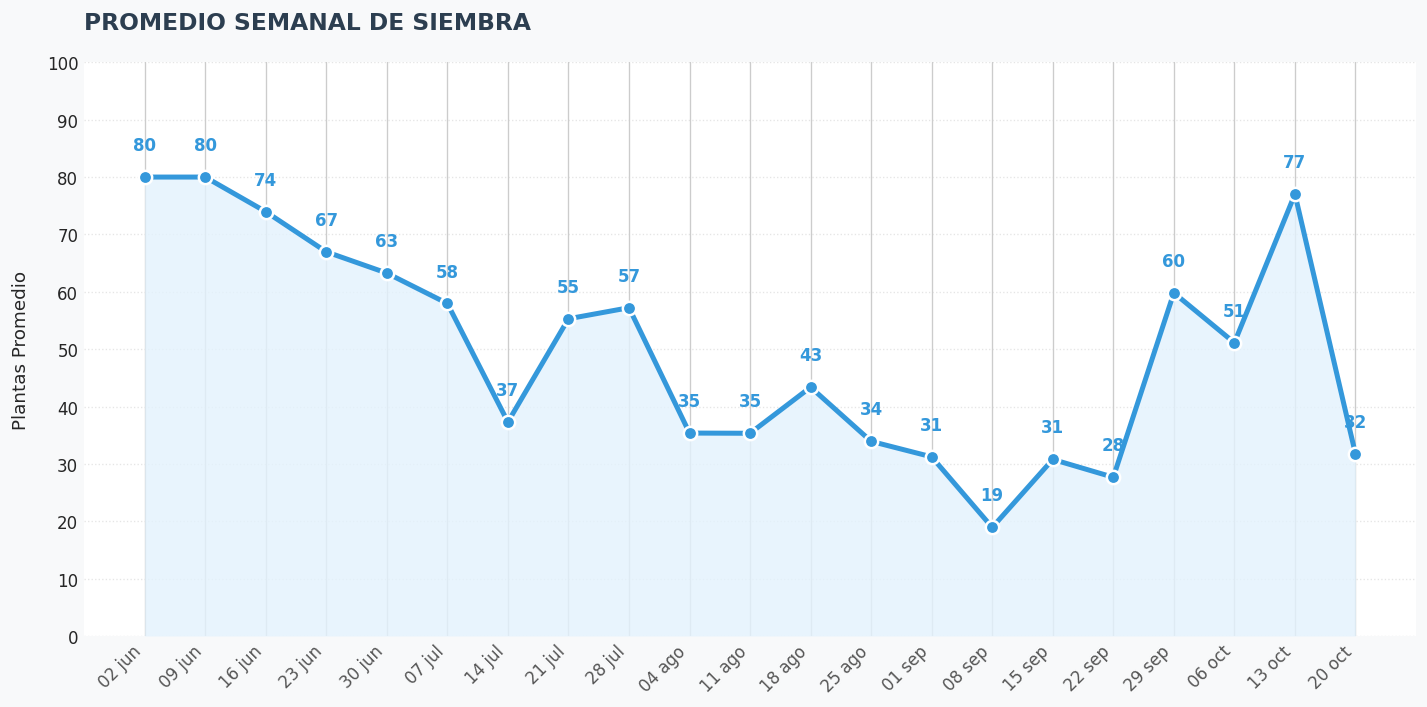

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import locale

# Set locale to Spanish for date formatting
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

df=planting

# Prepare data - using your 'planting' DataFrame
df['date'] = pd.to_datetime('2025-06-01') + pd.to_timedelta(df['day'] - 1, unit='D')
weekly_data = df.resample('W-Mon', on='date')['quantity'].mean().reset_index()

# Create figure
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')

# Custom color palette
main_color = '#3498db'  # Vibrant blue
fill_color = '#e3f2fd'  # Light blue fill

# Plot weekly average as area chart
ax.fill_between(weekly_data['date'],
                weekly_data['quantity'],
                color=fill_color,
                alpha=0.8,
                linewidth=0)

# Plot main line
ax.plot(weekly_data['date'], weekly_data['quantity'],
        marker='o',
        markersize=8,
        markerfacecolor=main_color,
        markeredgecolor='white',
        markeredgewidth=1.5,
        color=main_color,
        linewidth=3,
        label='Promedio Semanal') # Translated label

# Customize x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b')) # Format as day month (e.g., 01 Jun)
ax.set_xticks(weekly_data['date']) # Keep tick positions
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='#555555') # Rotate and style labels

# Customize y-axis
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0, weekly_data['quantity'].max() * 1.25)

# Add value labels above points
for date, qty in zip(weekly_data['date'], weekly_data['quantity']):
    ax.text(date, qty + 0.05*weekly_data['quantity'].max(),
            f"{qty:.0f}",
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            color=main_color)

# Title and labels
ax.set_title('PROMEDIO SEMANAL DE SIEMBRA', # Translated title
             pad=20, fontsize=14, fontweight='bold',
             loc='left', color='#2c3e50')
ax.set_ylabel('Plantas Promedio', labelpad=10, fontsize=11) # Translated label

# Remove spines and grid
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle=':', alpha=0.5)

# Add subtle horizontal line at y=0
ax.axhline(y=0, color='#cccccc', linewidth=0.5)

plt.tight_layout()
plt.show()

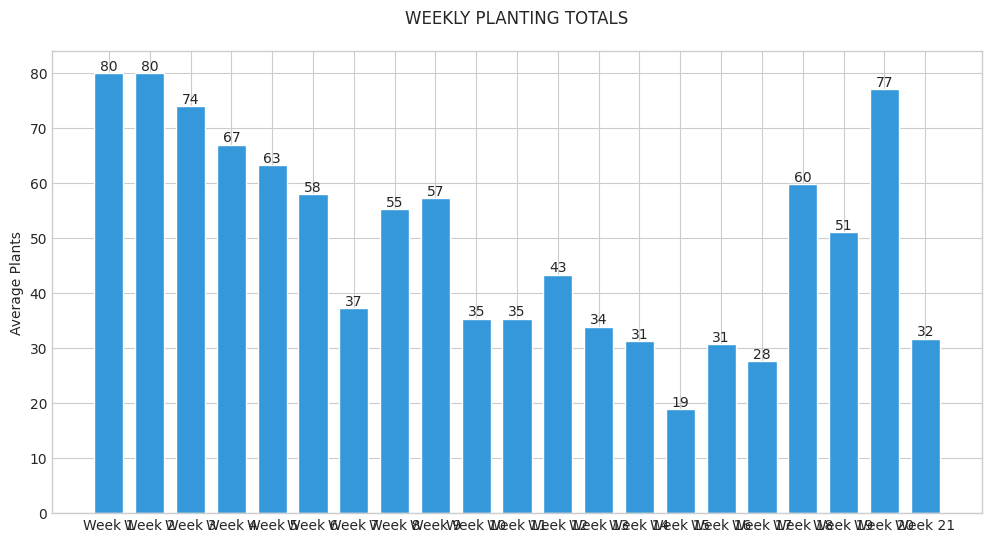

In [46]:
# For a more categorical weekly view
plt.figure(figsize=(12, 6))
bars = plt.bar(weekly_data['date'], weekly_data['quantity'],
               width=5,  # Controls bar width in days
               color=main_color,
               edgecolor='white',
               linewidth=1)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom',
             fontsize=10)

plt.title('WEEKLY PLANTING TOTALS', pad=20)
plt.xticks(weekly_data['date'], [f"Week {i+1}" for i in range(len(weekly_data))])
plt.ylabel('Average Plants')
plt.show()